In [20]:
import numpy as np
from com1DFAUtils import *
from pathlib import Path
import matplotlib.pyplot as plt

from screeninfo import get_monitors
import requests

mplstyle_url = "https://gitlab.com/Grommi/mplstyle/-/raw/main/mjr_dark.mplstyle?ref_type=heads"
response = requests.get(mplstyle_url)
with open('mjr_dark.mplstyle', 'wb') as f:
    f.write(response.content)
plt.style.use(['mjr_dark.mplstyle'])
for m in get_monitors():
    print(m)
    if m.is_primary:
    # small screen 286mm
        if m.width_mm == 286:
            print("Laptop")
            plt.rcParams["figure.figsize"] = (9,5)
        else:
            print("Another Monitor")
            plt.rcParams["figure.figsize"] = (8,4)

%load_ext autoreload
%autoreload 2

def compute_normals(dem, dx=1.0, dy=1.0):
    # Compute gradients in x and y direction
    dz_dy, dz_dx = np.gradient(dem, dy, dx)

    # Surface normal: N = [-dz/dx, -dz/dy, 1]
    normal_x = -dz_dx
    normal_y = -dz_dy
    normal_z = np.ones_like(dem)

    # Normalize the normal vectors
    norm = np.sqrt(normal_x**2 + normal_y**2 + normal_z**2)
    normal_x /= norm
    normal_y /= norm
    normal_z /= norm

    # Stack into a 3D array (H, W, 3)
    normals = np.stack((normal_x, normal_y, normal_z), axis=-1)
    return normals



Monitor(x=434, y=2160, width=2736, height=1824, width_mm=260, height_mm=173, name='\\\\.\\DISPLAY1', is_primary=False)
Monitor(x=0, y=0, width=3840, height=2160, width_mm=621, height_mm=341, name='\\\\.\\DISPLAY2', is_primary=True)
Another Monitor
Monitor(x=3840, y=225, width=1080, height=1920, width_mm=296, height_mm=527, name='\\\\.\\DISPLAY3', is_primary=False)
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [96]:
case = "avaParabola"
path = Path(r"C:\git\snow_avalanches\AvaFrame\avaframe\dataDFA") / case / "Inputs"
dem_header, dem = get_dem(path)

_y = np.arange(0, dem_header["nrows"] * dem_header["cellsize"],  dem_header["cellsize"])
_x = np.arange(0, dem_header["ncols"] * dem_header["cellsize"],  dem_header["cellsize"])
xx, yy = np.meshgrid(_x, _y)
ux = np.linspace(0, 1, dem_header["ncols"])
vy = np.linspace(0, 1, dem_header["nrows"])
uu, vv = np.meshgrid(np.linspace(0, 1, dem_header["ncols"]), np.linspace(0, 1, dem_header["nrows"]))
dx = dem_header["cellsize"]
normals_computed = compute_normals(dem, dx=dx, dy=dx)
print(normals_computed[1, 1])  # Normal vector at center point
dem_header

[ 0.80291221 -0.          0.5960973 ]


{'ncols': 1001,
 'nrows': 401,
 'cellsize': 5.0,
 'xllcenter': 1000.0,
 'yllcenter': -5000.0,
 'nodata_value': nan,
 'crs': None,
 'driver': 'AAIGrid',
 'transform': Affine(5.0, 0.0, 997.5,
        0.0, -5.0, -2997.5)}

Normal vector component 0 min: -0.90, max: 1.00
Normal vector component 1 min: -0.98, max: 1.00
Normal vector component 2 min: 0.01, max: 1.00


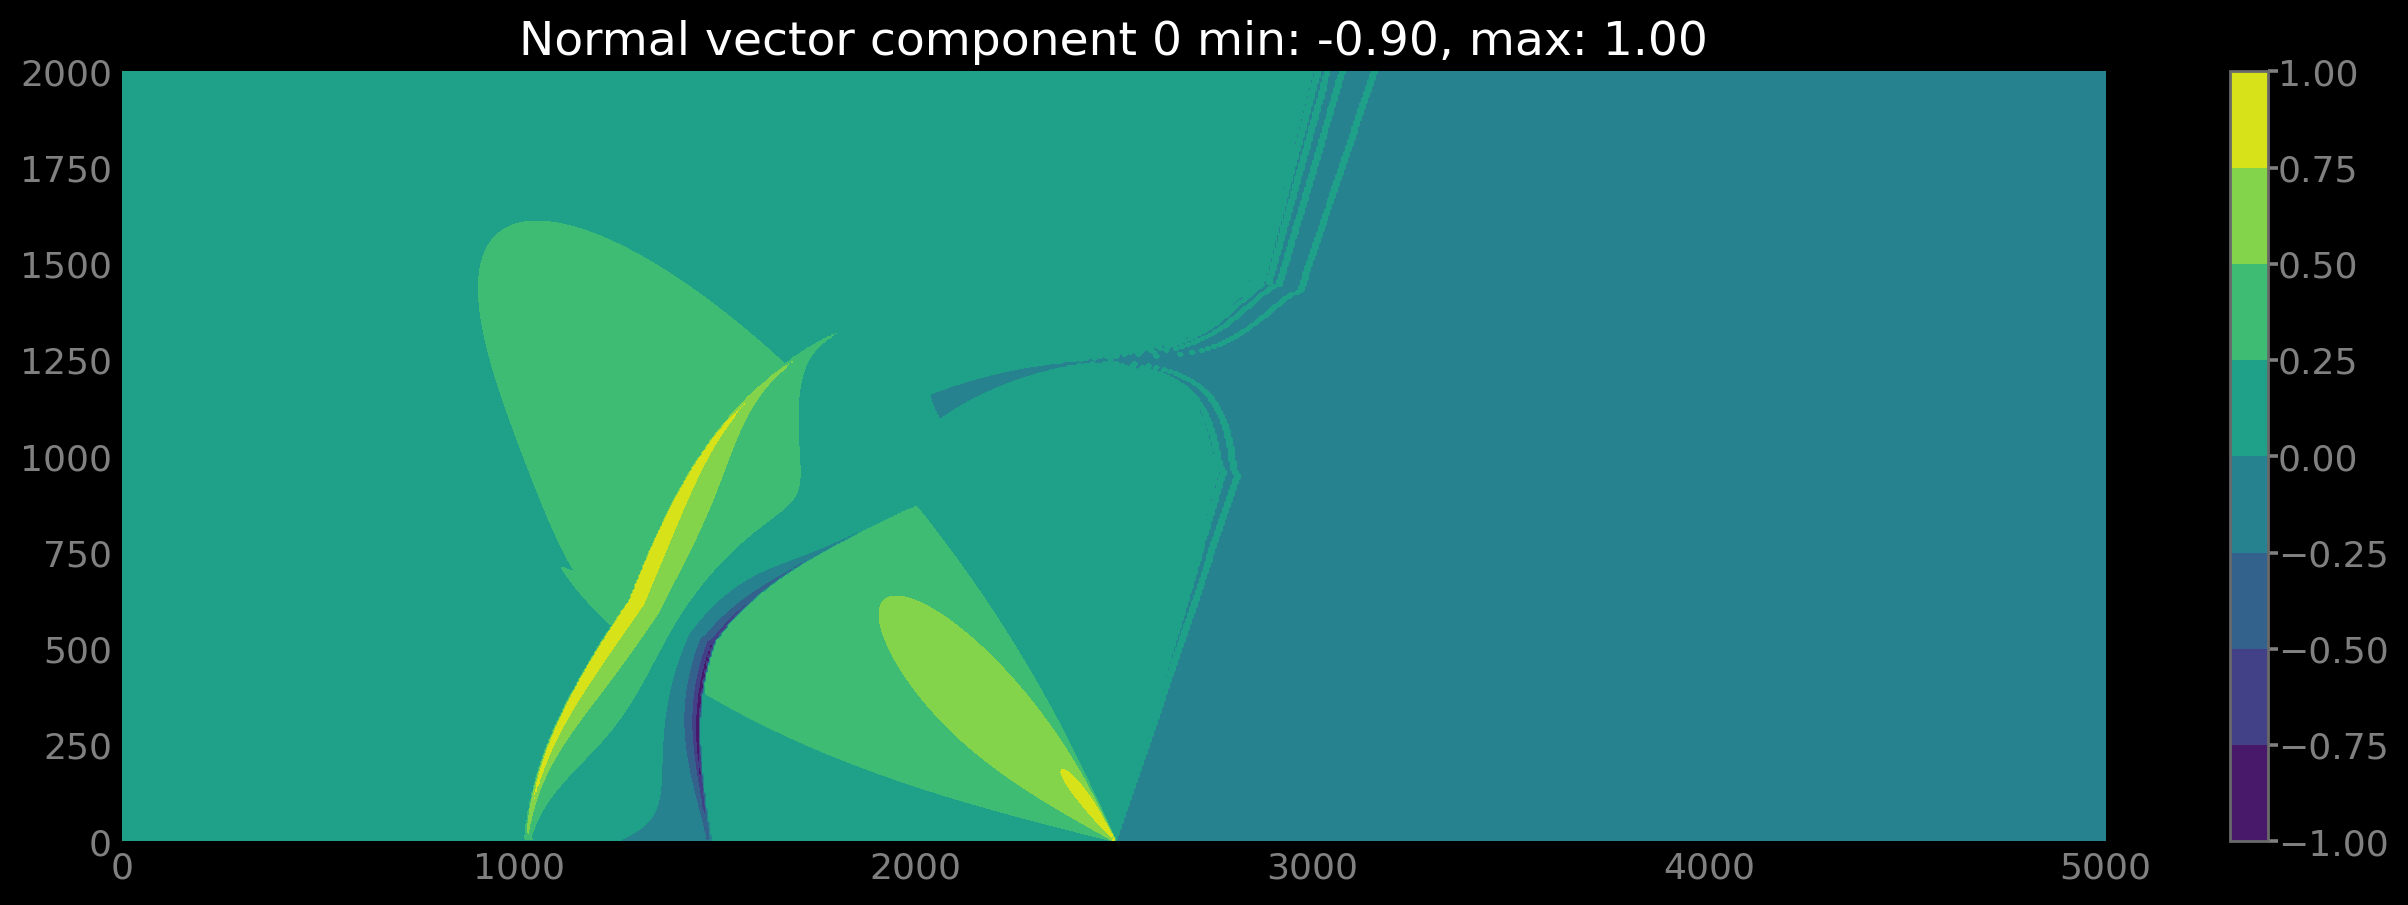

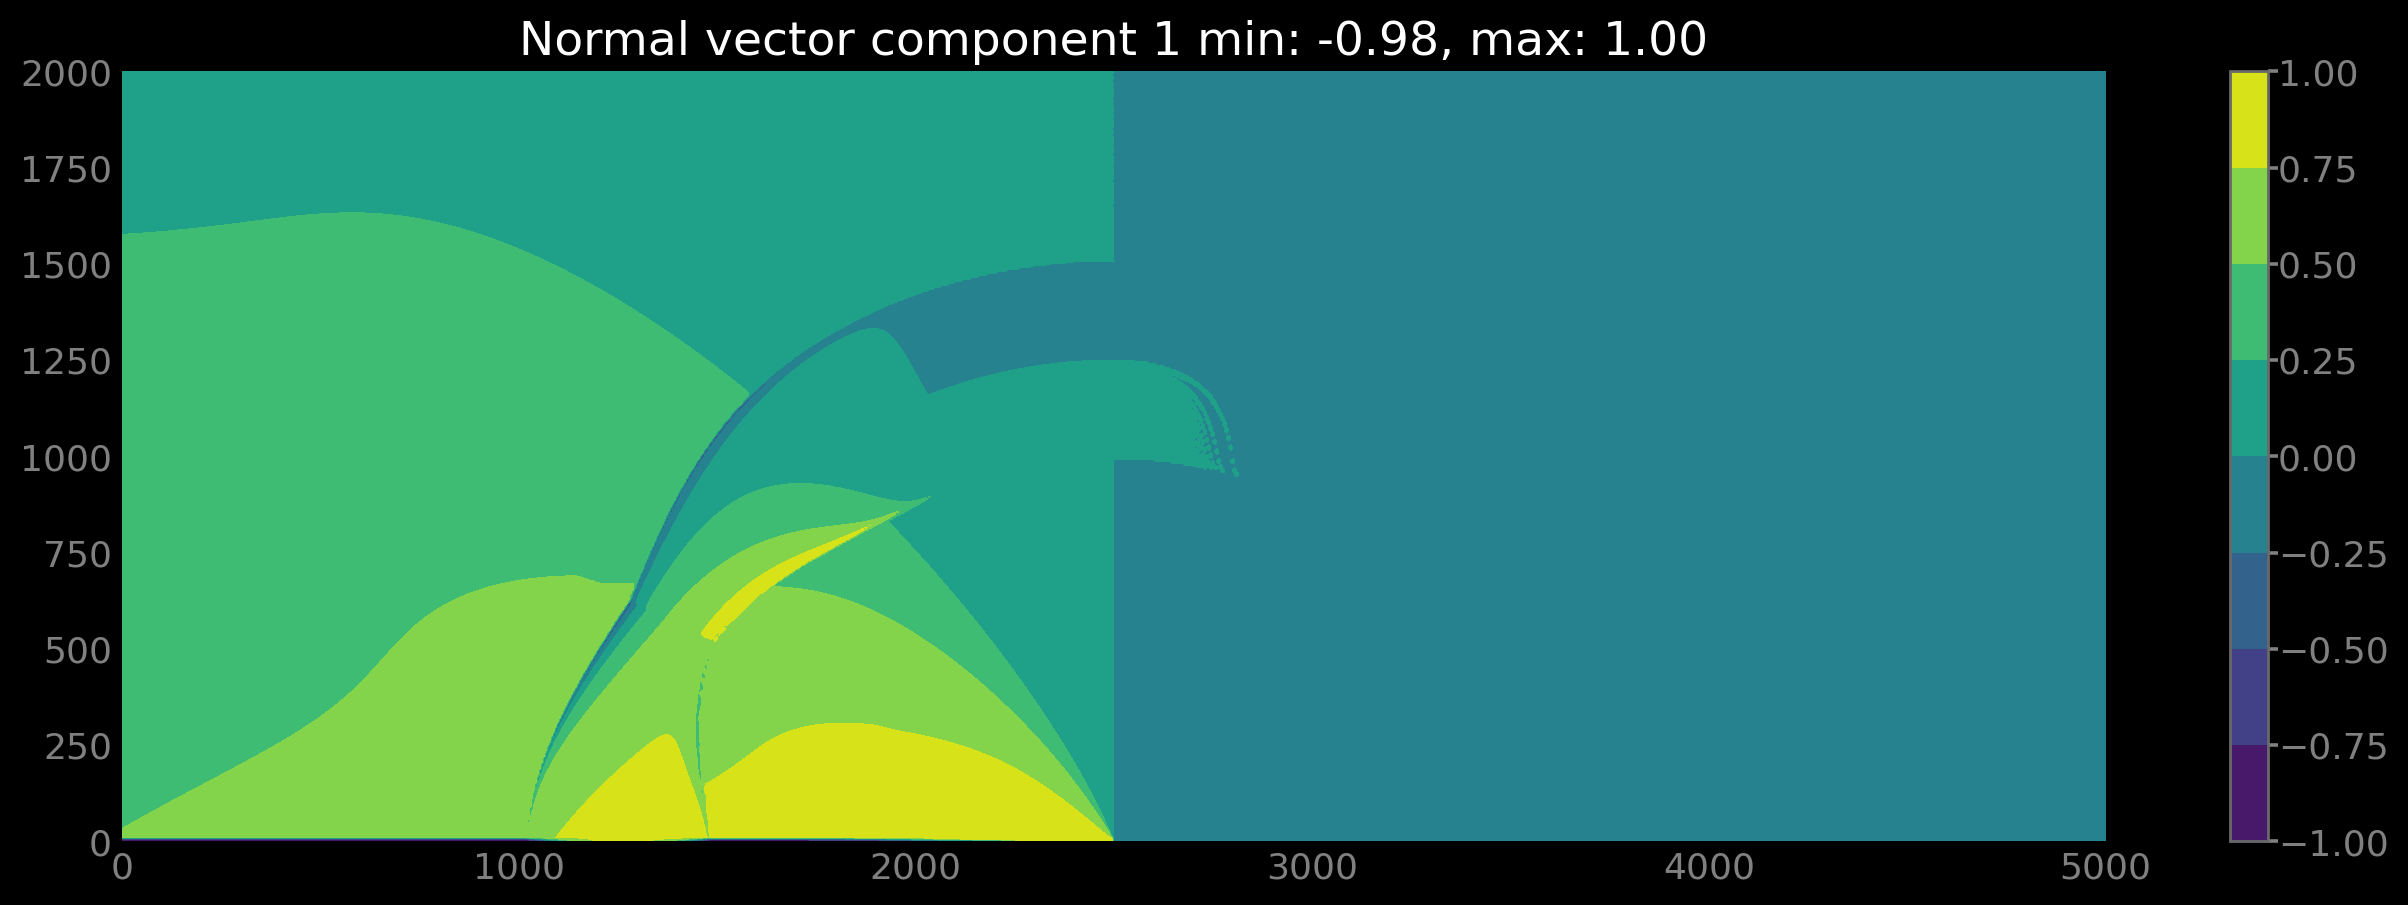

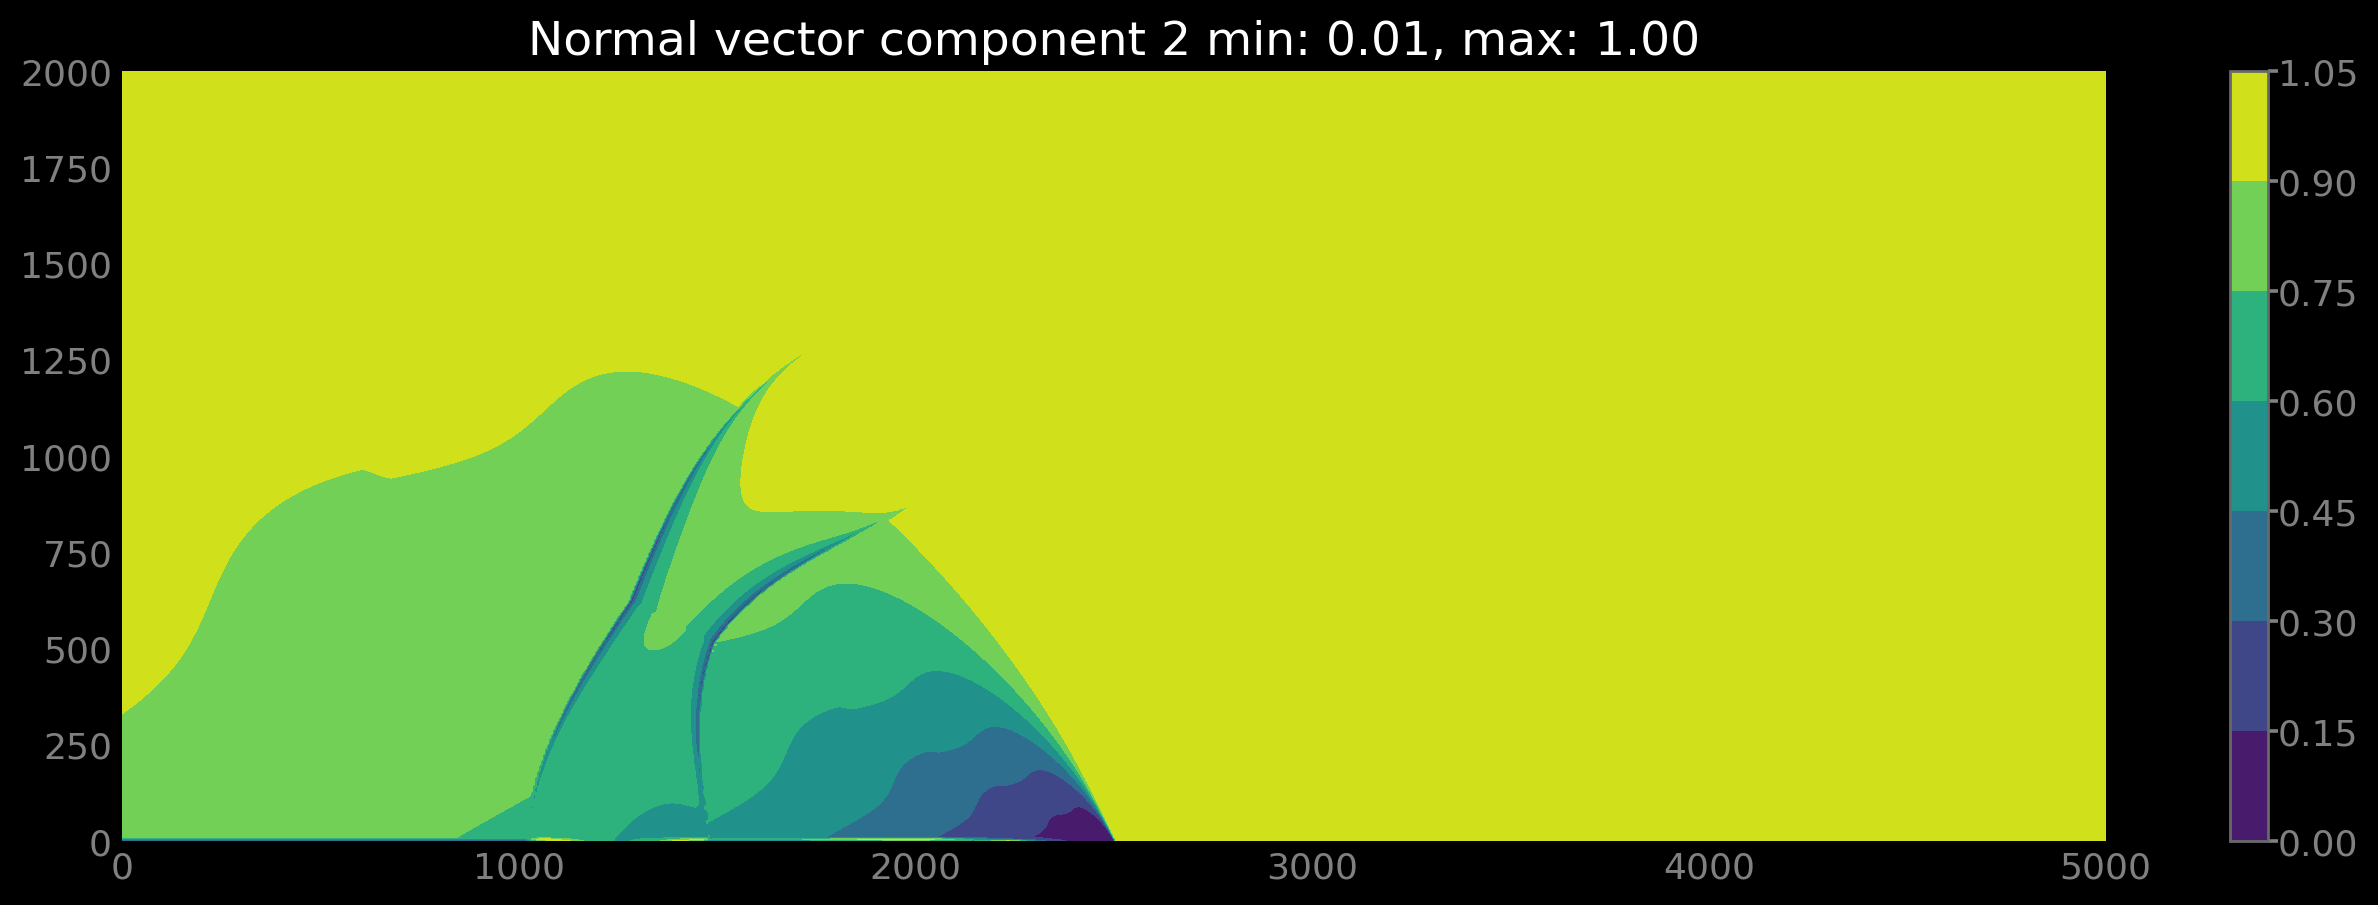

In [3]:
for axis in range(3):
    plt.figure()
    cntr = plt.contourf(xx, yy, normals_computed[:, :, axis])
    plt.colorbar(cntr)
    plt.title(f"Normal vector component {axis} min: {np.min(normals_computed[:, :, axis]):.2f}, max: {np.max(normals_computed[:, :, axis]):.2f}")
    
    print(f"Normal vector component {axis} min: {np.min(normals_computed[:, :, axis]):.2f}, max: {np.max(normals_computed[:, :, axis]):.2f}")

In [4]:
cellsize = dem_header["cellsize"]
width = dem.shape[1] * cellsize
height = dem.shape[0] * cellsize
print(f"Width: {width}, Height: {height}")

Width: 5005.0, Height: 2005.0


In [5]:
x = 3002
y = 1004
x_idx =  round(x/cellsize)
y_idx =  round(y/cellsize)
u = x / width
v = y / height
dem[y_idx, x_idx] 
dem[round(v * height / cellsize), round(u * width / cellsize)]
(round(v * height / cellsize), round(u * width / cellsize))
x_idx_low = int(x/cellsize)
y_idx_low = int(y/cellsize)
print(f"Low indices: ({x_idx_low}, {y_idx_low})")

Low indices: (600, 200)


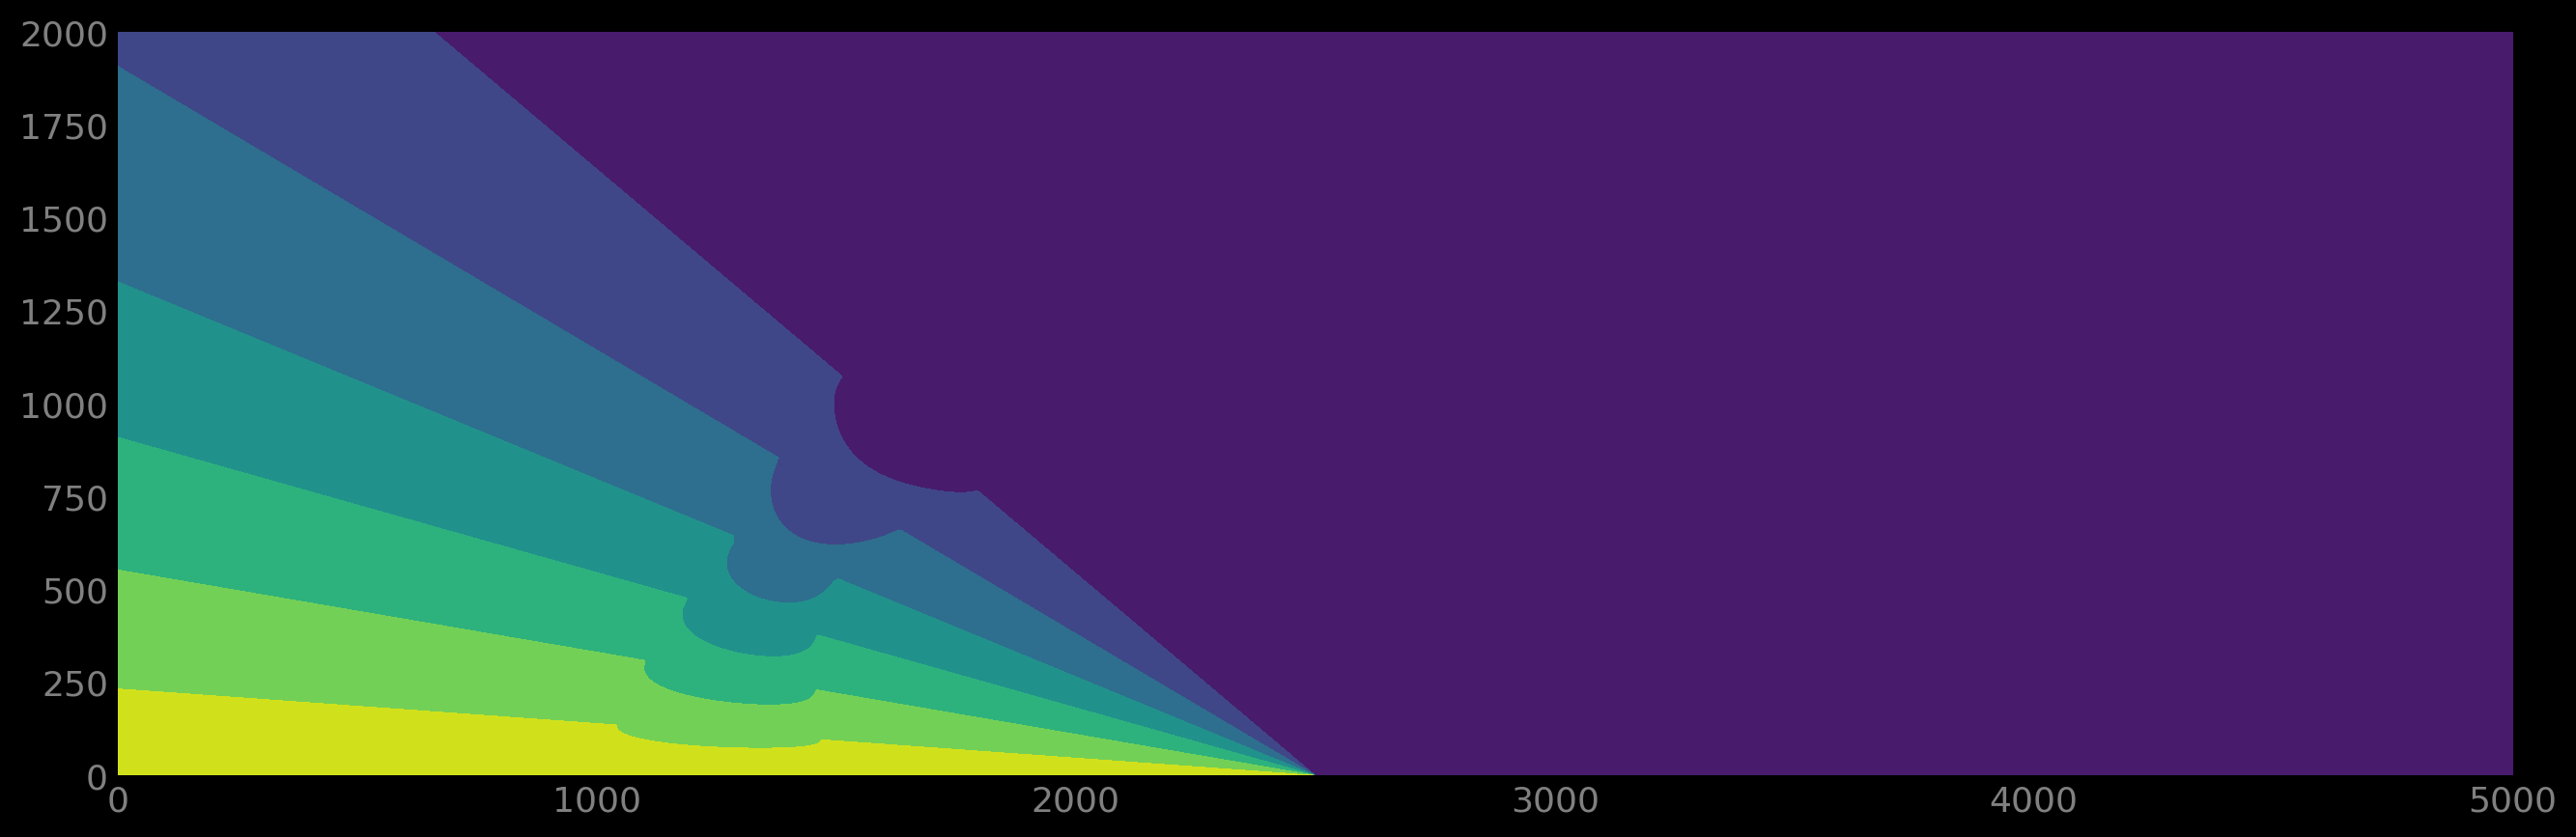

In [6]:
plt.contourf(xx, yy, dem)

[(2982.0, 3022.0), (984.0, 1024.0), None]

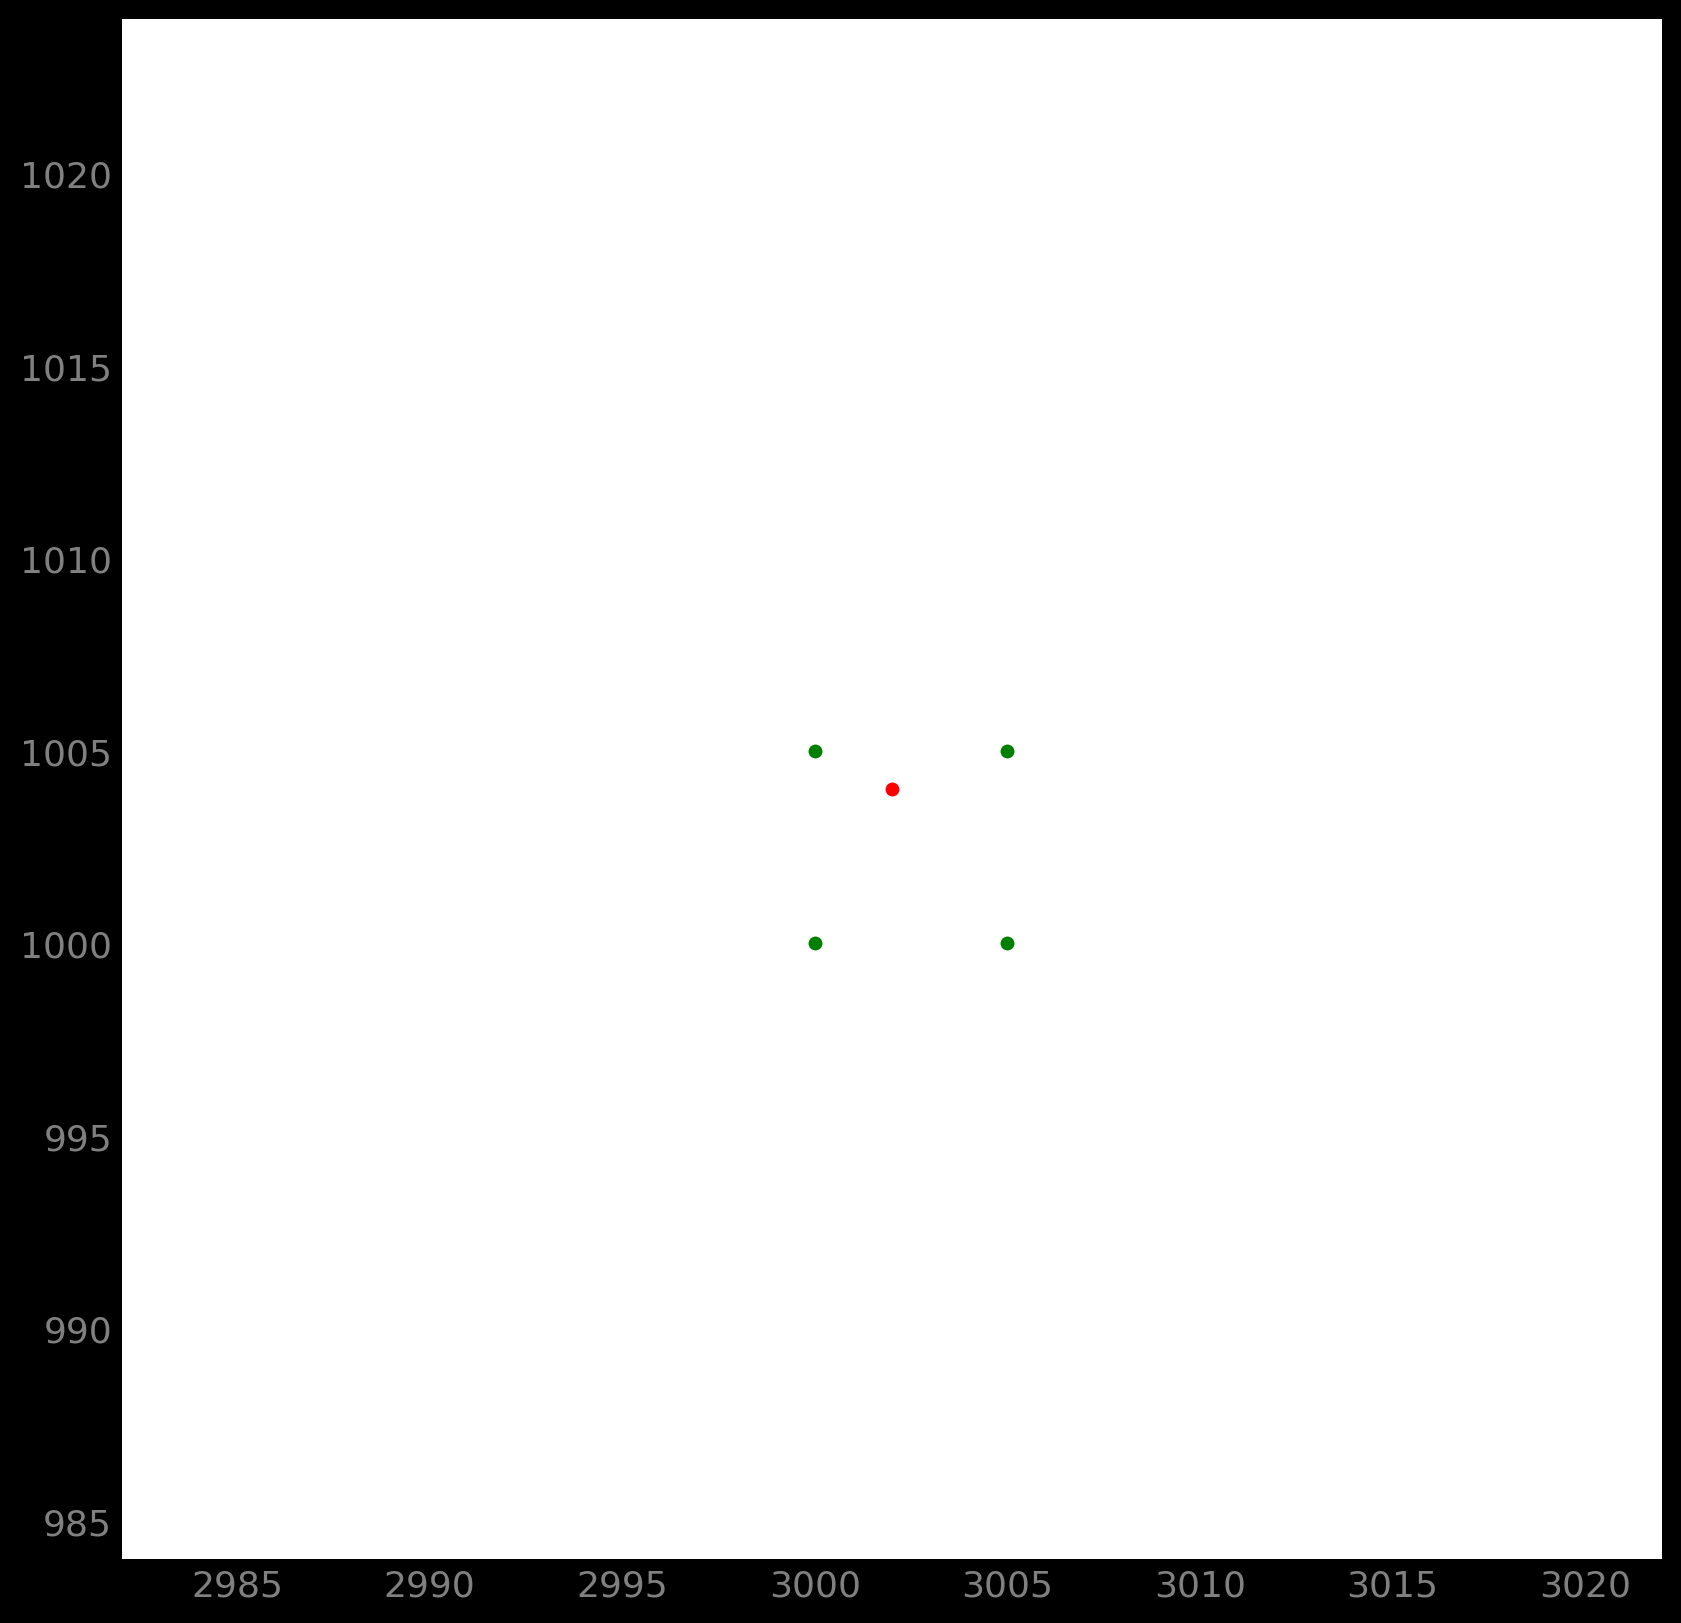

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.contourf(xx, yy, dem, cmap="Grays", levels = 100)
ax.plot(xx, yy, color="white", linewidth=0.5)
ax.plot(xx.T, yy.T, color="white", linewidth=0.5)
ax.plot(x, y, "ro", markersize=5)
ax.plot(x_idx_low * dx, y_idx_low * dx, "go", markersize=5)
ax.plot((x_idx_low + 1) * dx, y_idx_low * dx, "go", markersize=5)
ax.plot(x_idx_low * dx, (y_idx_low + 1) * dx, "go", markersize=5)
ax.plot((x_idx_low + 1) * dx, (y_idx_low + 1) * dx, "go", markersize=5)
# ax.plot(u_idx_low, v_idx_low, "ro", markersize=1)
# ax.plot(u_idx_low + 1, v_idx_low, "ro", markersize=1)
plot_area = 20
ax.set(xlim=(x - plot_area, x + plot_area), ylim=(y - plot_area, y + plot_area), aspect='equal')


In [8]:
x = 3000
y = 1004

u = x / width
v = y / height

u_idx_low = int(u * width / cellsize) - 1
v_idx_low = int(v * height / cellsize)

print(f"u_idx_low: {u_idx_low}, v_idx_low: {v_idx_low}")
print(u, v)
print((u_idx_low + 1) / width * cellsize)
print((v_idx_low + 1) / height * cellsize)
print(uu[0, u_idx_low])
print(vv[v_idx_low, 0])

u_idx_low: 599, v_idx_low: 200
0.5994005994005994 0.5007481296758105
0.5994005994005994
0.5012468827930174
0.599
0.5


[(0.5894005994005994, 0.6094005994005994),
 (0.4907481296758105, 0.5107481296758105)]

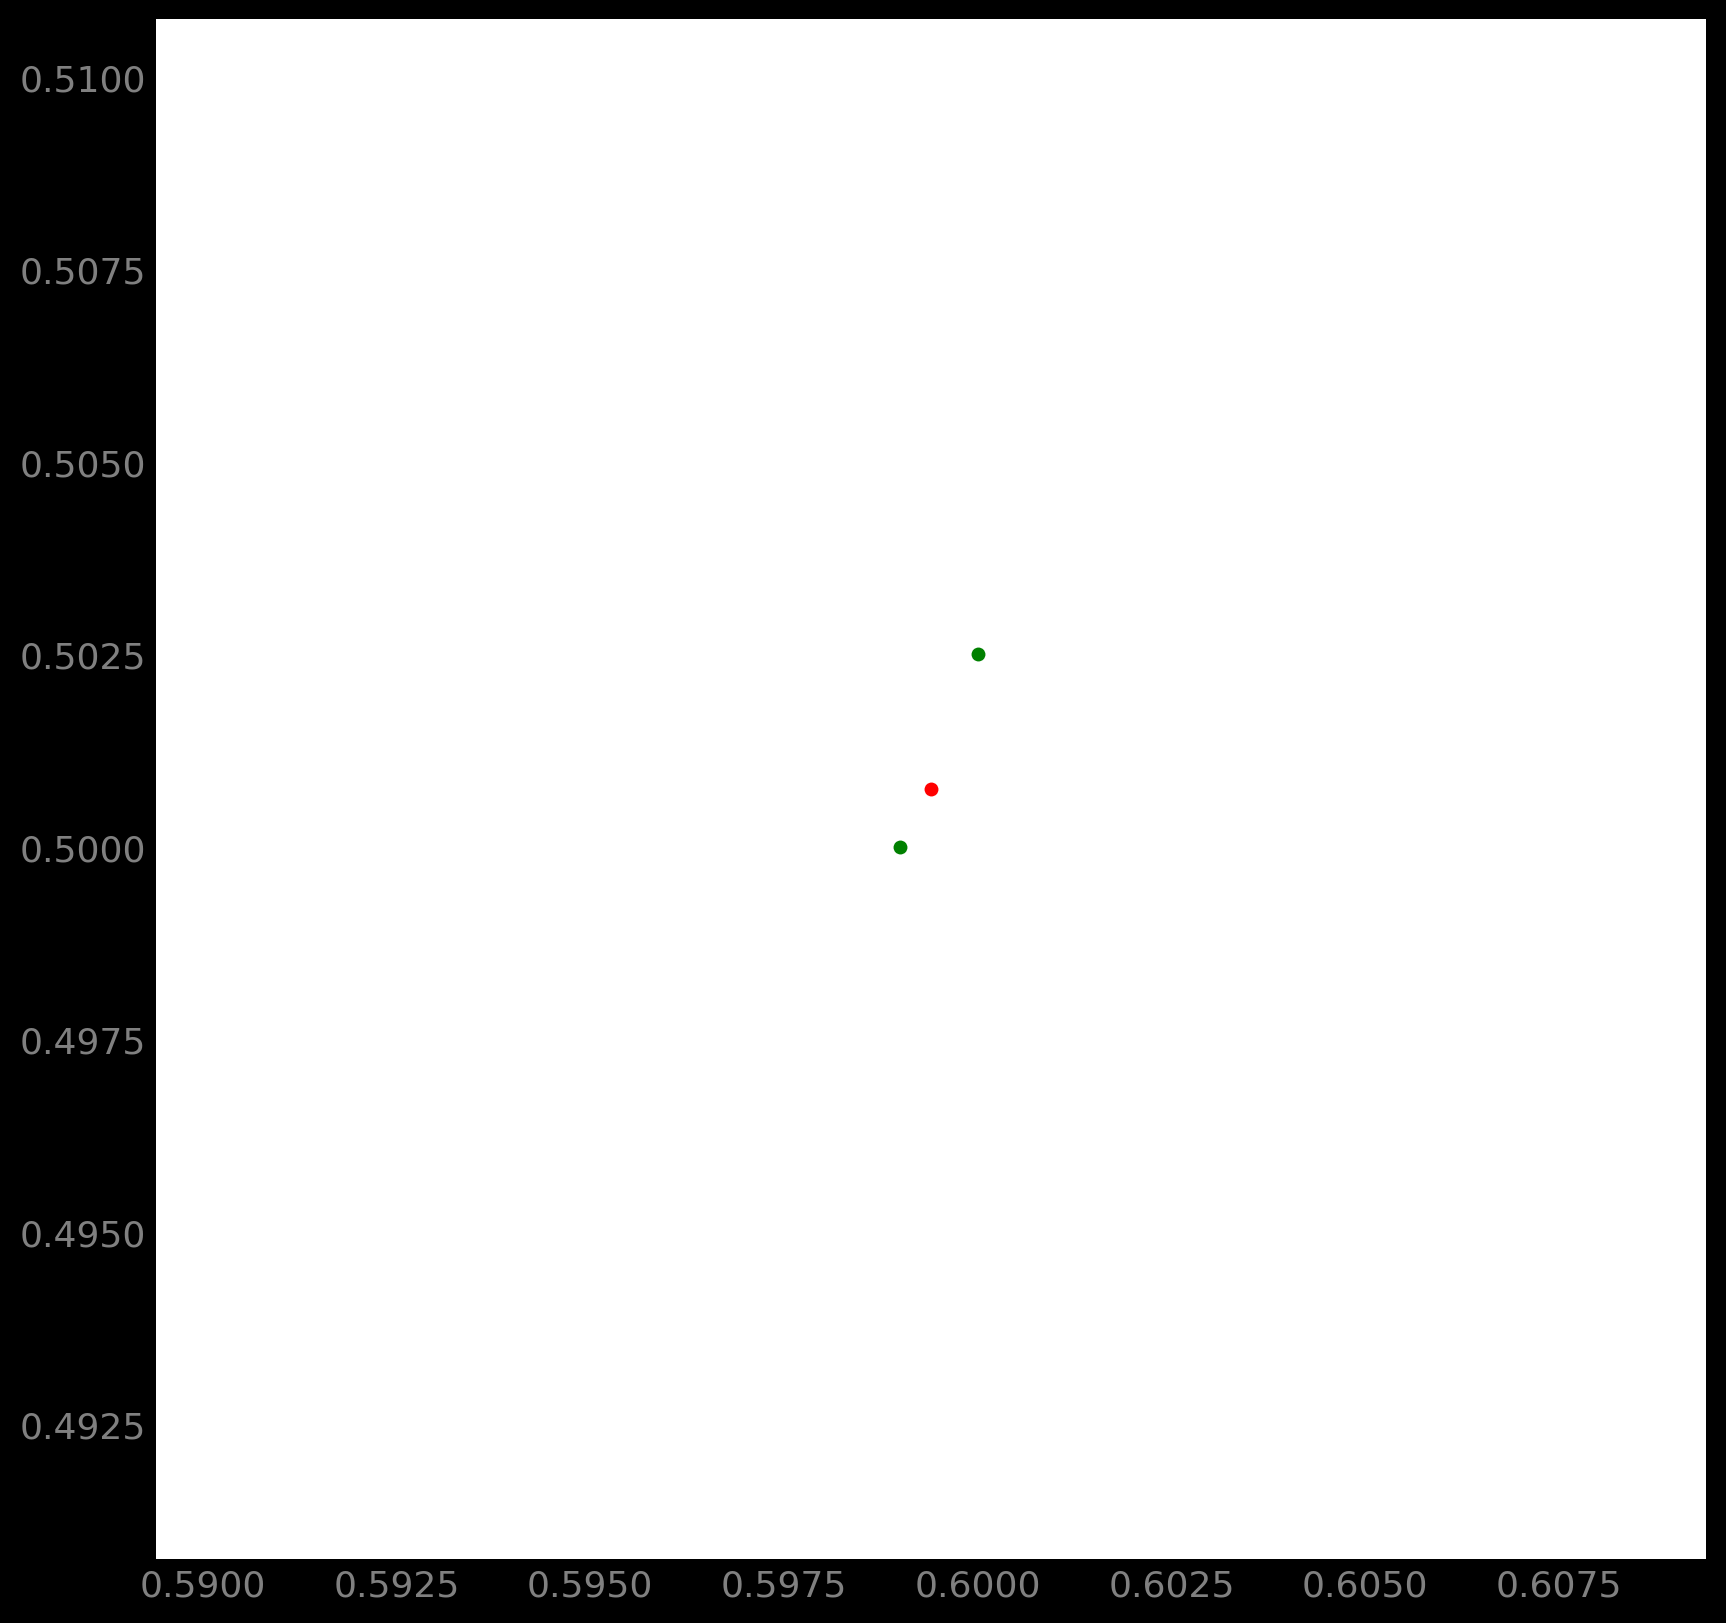

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.contourf(uu, vv, dem, cmap="Grays", levels = 100)
ax.plot(uu, vv, color="white", linewidth=0.5)
ax.plot(uu.T, vv.T, color="white", linewidth=0.5)
ax.plot(u, v, "ro", markersize=5)
ax.plot(ux[u_idx_low], vy[v_idx_low], "go", markersize=5)
ax.plot(ux[u_idx_low+1], vy[v_idx_low+1], "go", markersize=5)
# ax.plot((x_idx_low + 1) * dx, y_idx_low * dx, "go", markersize=5)
# ax.plot(x_idx_low * dx, (y_idx_low + 1) * dx, "go", markersize=5)
# ax.plot((x_idx_low + 1) * dx, (y_idx_low + 1) * dx, "go", markersize=5)
# # ax.plot(u_idx_low, v_idx_low, "ro", markersize=1)
# # ax.plot(u_idx_low + 1, v_idx_low, "ro", markersize=1)
plot_area = .01
ax.set(xlim=(u - plot_area, u + plot_area), ylim=(v - plot_area, v + plot_area))

In [10]:
def interp(values, x, y, x_coords, y_coords):
    x_idx_low = int(x/(x_coords[1] - x_coords[0]))
    y_idx_low = int(y/(y_coords[1] - y_coords[0]))
    x_idx_low, y_idx_low, 
    Q11 = values[y_idx_low, x_idx_low]
    Q21 = values[y_idx_low, x_idx_low + 1]
    Q12 = values[y_idx_low + 1, x_idx_low]
    Q22 = values[y_idx_low + 1, x_idx_low + 1]

    x2 = x_coords[x_idx_low + 1]
    x1 = x_coords[x_idx_low]
    y2 = y_coords[y_idx_low + 1]
    y1 = y_coords[y_idx_low]

    # Perform bilinear interpolation
    interpolated_value = (
        Q11 * (x2 - x) * (y2 - y) +
        Q21 * (x - x1) * (y2 - y) +
        Q12 * (x2 - x) * (y - y1) +
        Q22 * (x - x1) * (y - y1)
    ) / ((x2 - x1) * (y2 - y1))
    return interpolated_value
print(dem[y_idx_low, x_idx_low])
print(dem[y_idx_low, x_idx_low + 1])
x = 3002.5
interp(normals_computed, x, y, _x, _y)

0.0
0.0


array([-0., -0.,  1.])

In [316]:
def acceleration_by_gravity(normal):
    a_g = np.array([0.0, 0.0, -9.81])  # Acceleration due to gravity
    a_n = - a_g[2] * normal[2] * normal
    return a_n, a_g

def acceleration_by_friction(a_n, mass_per_area, velocity, model="VoellmyMinShear"):
    model = model.lower()
    mu_coulomb = 0.155
    mu_voellmy = 0.155
    xsi_voellmy = 4000.
    muvoellmyminshear = 0.155
    xsivoellmyminshear = 4000.
    tau0voellmyminshear = 70
    #+++++++++++++CoulombMinShear friction model
    mucoulombminshear = 0.155
    tau0coulombminshear = 70

    velocity_magnitude = np.linalg.norm(velocity)
    if velocity_magnitude < 0.001:
        return np.array([0.0, 0.0, 0.0])
    sigma_bottom = np.linalg.norm(a_n) * mass_per_area
    # Coulomb
    if model == "coulomb":  
        tau = mu_coulomb * sigma_bottom
    # voellmy
    if model == "voellmy":
        tau = mu_voellmy * sigma_bottom + rho * g * (velocity_magnitude ** 2) / xsi_voellmy
    # voellmy MinShear friction type
    if model == "voellmyminshear":
        tau = muvoellmyminshear * sigma_bottom + rho * g * velocity_magnitude * velocity_magnitude / xsivoellmyminshear + tau0voellmyminshear
    musamosat = 0.155
    tau0samosat = 0
    Rs0samosat = 0.222
    kappasamosat = 0.43
    Rsamosat = 0.05
    Bsamosat = 4.13
    if model == "samosat":
        tau = samos_at_friction(rho, tau0samosat, Rs0samosat, musamosat, kappasamosat, Bsamosat, Rsamosat, velocity_magnitude, sigma_bottom, slab_height_m)
          
    a_friction = tau / mass_per_area
    return a_friction


import math
def samos_at_friction(rho, tau0, Rs0, mu, kappa, B, R, v, p, h):
    
    Rs = rho * v * v / (p + 0.001)
    div = h / R
    if div < 1.0:
        div = 1.0
    div = math.log(div) / kappa + B
    tau = tau0 + p * mu * (1.0 + Rs0 / (Rs0 + Rs)) + rho * v * v / (div * div)
    return tau
    
    


In [374]:
# helix channel
release_points = [
    [1092.06631166,   89.31193946],
    [1121.39318837,  300.38574958],
    [1407.43903814,  298.14099516],
    [1432.5970852,    85.77701794],
    [1092.06631166,   89.31193946],
]

# parabola
release_points = [
    [1519.31472837,  875.        ],
    # [1519.31472837, 1125.        ],
    [1865.72488989, 1125.        ],
    # [1865.72488989,  875.        ],
    # [1519.31472837,  875.        ]
]
timesteps = 10000
g = 9.81
n_trajectories = len(release_points)
friction_coefficient = 0.155
drag_coefficient = 4000
pixel_size_m = 5.0
density_kg_m3 = 200.0
rho = density_kg_m3
slab_height_m = 0.5
cfl = 0.5

# area_m2 = pixel_size_m * pixel_size_m
# mass_pixel_kg = density_kg_m3 * area_m2 * slab_height_m
# mass_particle_kg = mass_pixel_kg / n_trajectories
mass_per_area = density_kg_m3 * slab_height_m

# position = np.array([x, y, 0])
trajectory = np.zeros((n_trajectories, timesteps + 1, 3))
velocity = np.zeros((n_trajectories, timesteps + 1, 3))
stop = n_trajectories * [timesteps]
travel_length = np.zeros((n_trajectories, timesteps + 1, 3))
a_gs = np.zeros((n_trajectories, timesteps + 1, 3))
a_ns = np.zeros((n_trajectories, timesteps + 1, 3))
a_ts = np.zeros((n_trajectories, timesteps + 1, 3))
a_fs = np.zeros((n_trajectories, timesteps + 1, 3))
normals = np.zeros((n_trajectories, timesteps + 1, 3))
dts = np.zeros((n_trajectories, timesteps + 1))
def update_outputs():
    normals[j, i + 1] = normal
    a_gs[j, i + 1] = a_g
    a_ns[j, i + 1] = a_n
    a_ts[j, i + 1] = a_t
    a_fs[j, i + 1] = acc_fric
    dts[j, i + 1] = dt
    stop[j] = i + 2
    velocity[j, i + 1] = velocity_new
    trajectory[j, i + 1] = trajectory[j, i] + velocity_new * dt

for j in range(n_trajectories):
    trajectory[j, 0, :2] = release_points[j]
    normal = interp(normals_computed, trajectory[j, 0, 0], trajectory[j, 0, 1], _x, _y)
    # estimate first timestamp based on normal t = sqrt(dx / |a|), with dx cellsize
    a_n, a_g = acceleration_by_gravity(normal)
    a_t = (a_g + a_n)
    dt = np.sqrt(2 * dx / np.linalg.norm(a_t))
    for i in range(timesteps):
        normal = interp(normals_computed, trajectory[j, i, 0], trajectory[j, i, 1], _x, _y)
        a_n, a_g = acceleration_by_gravity(normal)
        a_t = (a_g + a_n)
        # acc = get_acc(normal, velocity[j, i])
        # estimate optimal timestep
        dt = min(10, cfl * dx / np.linalg.norm(velocity[j, i] + (a_t * dt)))
        # curvature
        # estimated_position = trajectory[j, i] + velocity[j, i] * dt
        # estimated_end_normal = interp(normals, estimated_position[0], estimated_position[1], _x, _y)
        # # only z coordinate is lagrangian for us, at least I think so (ux*(nxEnd-nx) + uy*(nyEnd-ny) + uz*(nzEnd-nz)) / dt
        # accNormCurv = velocity[j, i, 2]*(normal[2] - normal[2]) / dt 
        # normal_average = np.linalg.normalize(normal + estimated_end_normal)
        # dt = cfl * dx / (velocity[j, i] + np.sqrt(dx / np.linalg.norm(a_t)))
        acc_fric = acceleration_by_friction(a_n, mass_per_area, velocity[j, i], model="voellmy")
        velocity_tangential = velocity[j, i] + a_t * dt
        # print(i, velocity_tangential, acc_fric*dt, dt, np.linalg.norm(acc_fric*dt), np.linalg.norm(velocity_tangential), np.linalg.norm(velocity[j, i]), np.linalg.norm(a_t))
        if(np.linalg.norm(acc_fric*dt) > np.linalg.norm(velocity_tangential)):
            dt = np.linalg.norm(velocity_tangential) / np.linalg.norm(acc_fric)
            update_outputs()
            trajectory[j, i + 2:] = trajectory[j, i + 1]
            # stop[j] = i + 2
            break
        # explicit
        velocity_new = velocity_tangential - acc_fric * velocity_tangential / np.linalg.norm(velocity_tangential) * dt
        # implicit
        # velocity_new = velocity_tangential / (1.0 + dt * np.linalg.norm(acc_fric)/np.linalg.norm(velocity_tangential))
        update_outputs()
        # travel_length[j, i + 1] = velocity[j, i + 1] * dt
        velocity_magnitude = np.linalg.norm(velocity_new)
        
        if (trajectory[j, i + 1][0] > _x[-1] 
            or trajectory[j, i + 1][0] < _x[0] 
            or trajectory[j, i + 1][1] > _y[-1] 
            or trajectory[j, i + 1][1] < _y[0] 
            or velocity_magnitude < 0.0001
            ):
            
            trajectory[j, i + 1] = trajectory[j, i] + 0.5 * velocity_new * dt
            stop[j] = i + 2
            break



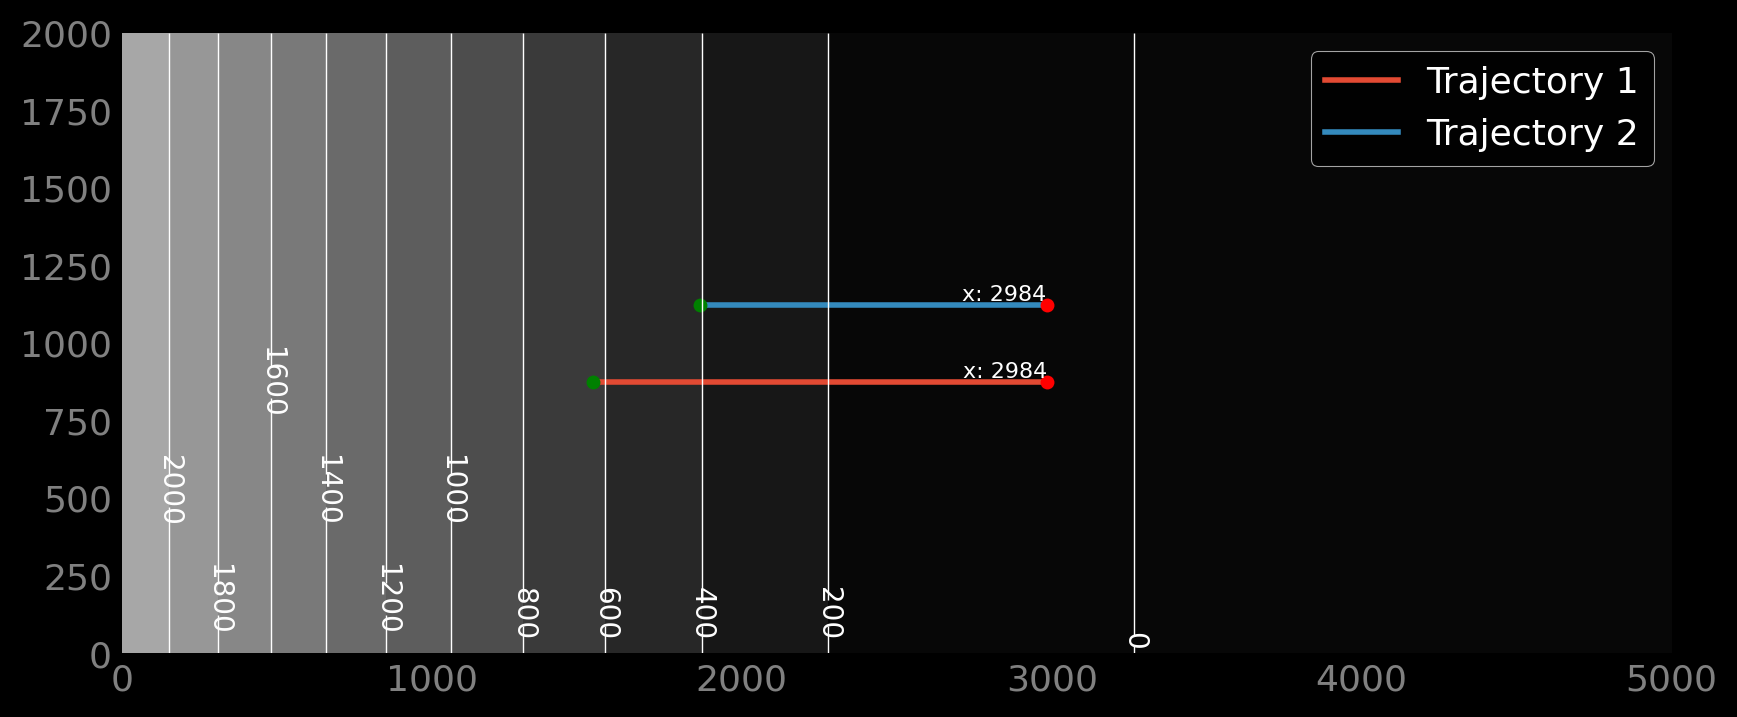

In [376]:

fig, ax = plt.subplots(figsize=(10, 10))
for i in range(n_trajectories):
    ax.plot(trajectory[i, :stop[i], 0], trajectory[i, :stop[i], 1], label=f"Trajectory {i+1}", linewidth=2)
    # start points
    ax.plot(release_points[i][0], release_points[i][1], "go", markersize=5)
    # stop points
    if stop[i] < timesteps:
        ax.plot(trajectory[i, stop[i], 0], trajectory[i, stop[i], 1], "ro", markersize=5)
        ax.text(trajectory[i, stop[i], 0], trajectory[i, stop[i], 1], f"x: {trajectory[i, stop[i], 0]:.0f}", fontsize=8, ha='right', va='bottom')
ax.set(aspect='equal')
ax.legend()
plot_dem(ax, dem, xx, yy)

[Text(0.5, 0, 'x [m]'), Text(0, 0.5, 'Velocity (m/s)')]

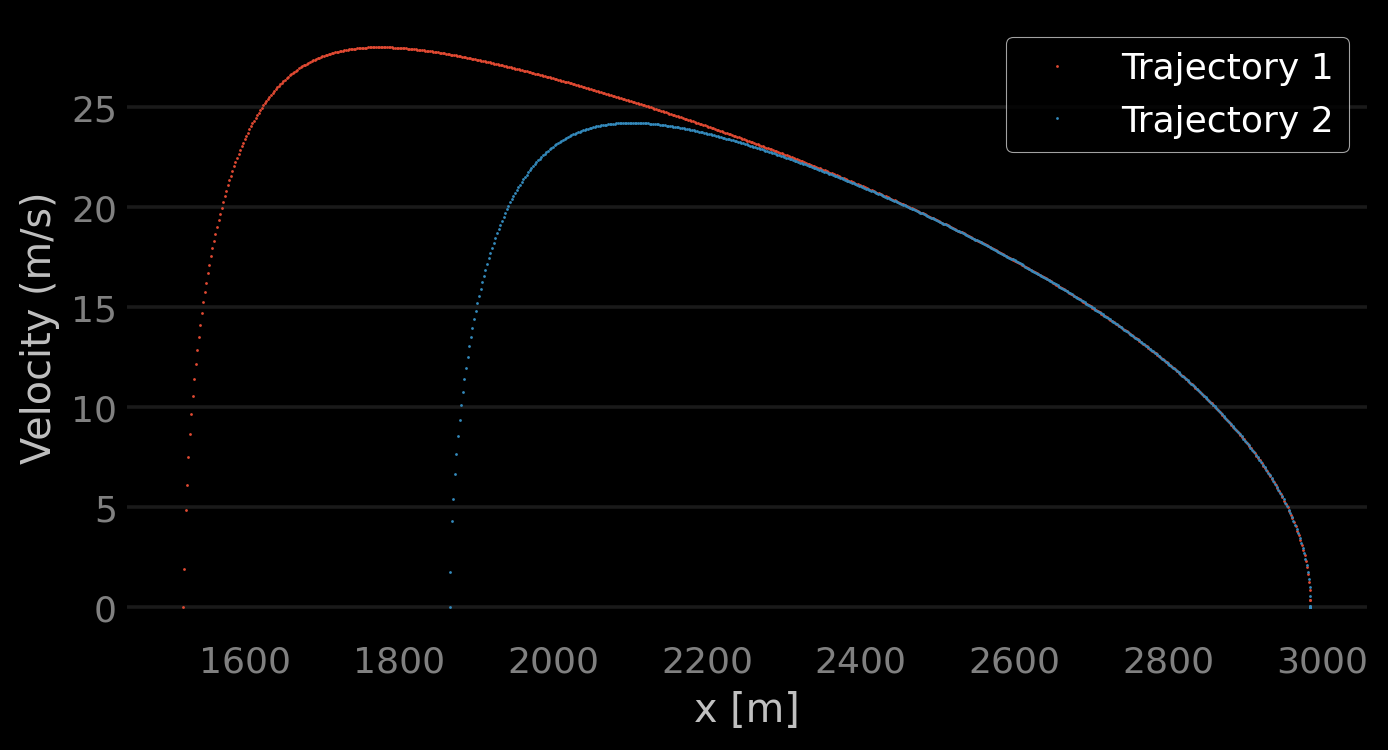

In [378]:
# velocity x plot
fig, ax = plt.subplots()
for i in range(n_trajectories):
    ax.plot(trajectory[i, :, 0], np.linalg.norm(velocity[i, :, :], axis=1), "o", markersize=1, label=f"Trajectory {i+1}")
ax.legend()
ax.set(xlabel="x [m]", ylabel="Velocity (m/s)")#, xlim=(2500, 3100))

[Text(0.5, 0, 'x [m]'), Text(0, 0.5, 'z[m]')]

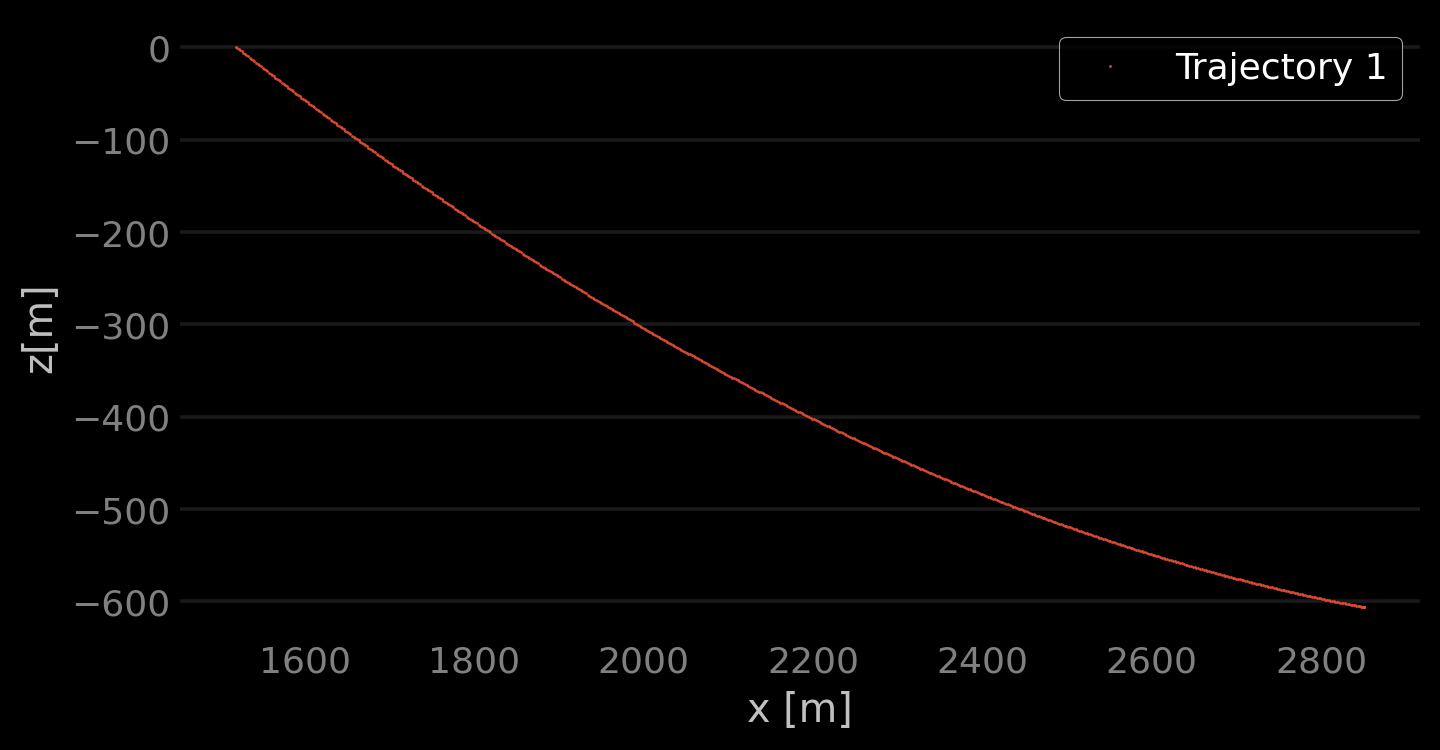

In [342]:
# x z plot
fig, ax = plt.subplots()
for i in range(n_trajectories):
    ax.plot(trajectory[i, :, 0], trajectory[i, :, 2], "o", markersize=1, label=f"Trajectory {i+1}")
ax.legend()
ax.set(xlabel="x [m]", ylabel="z[m]")#, xlim=(2800, 2900))

[Text(0.5, 0, 'Time step'), Text(0, 0.5, 'Step Length [m]')]

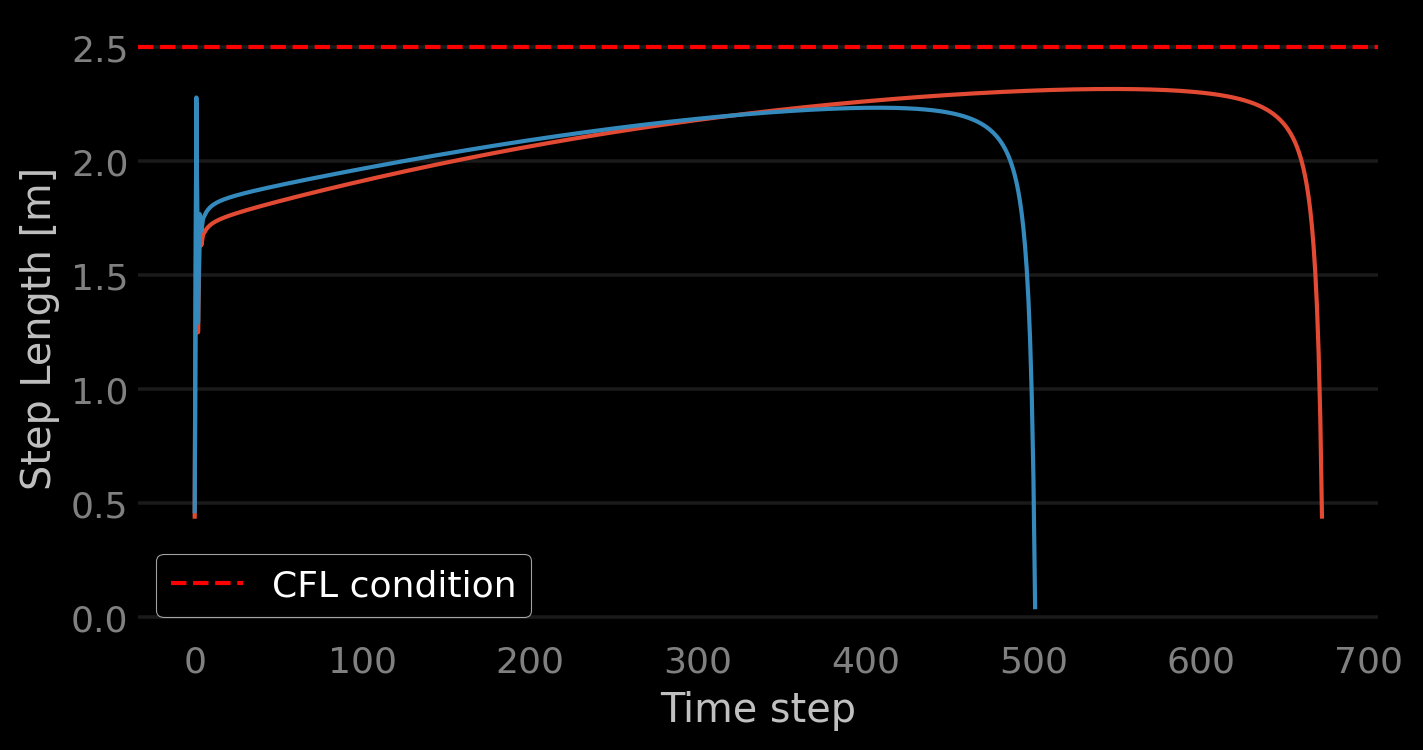

In [379]:
fig, ax = plt.subplots()
for i in range(n_trajectories):
    ax.plot(np.diff(np.linalg.norm(trajectory[i,], axis=1))[0:stop[i]-2])
ax.axhline(cfl * dx, color='r', linestyle='--', label='CFL condition')
ax.legend()
ax.set(xlabel='Time step', ylabel='Step Length [m]')

C:\Users\magge\AppData\Local\Temp\ipykernel_21824\4141123544.py:5: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



[Text(0.5, 0, 'Time step'), Text(0, 0.5, 'Step Duration [s]')]

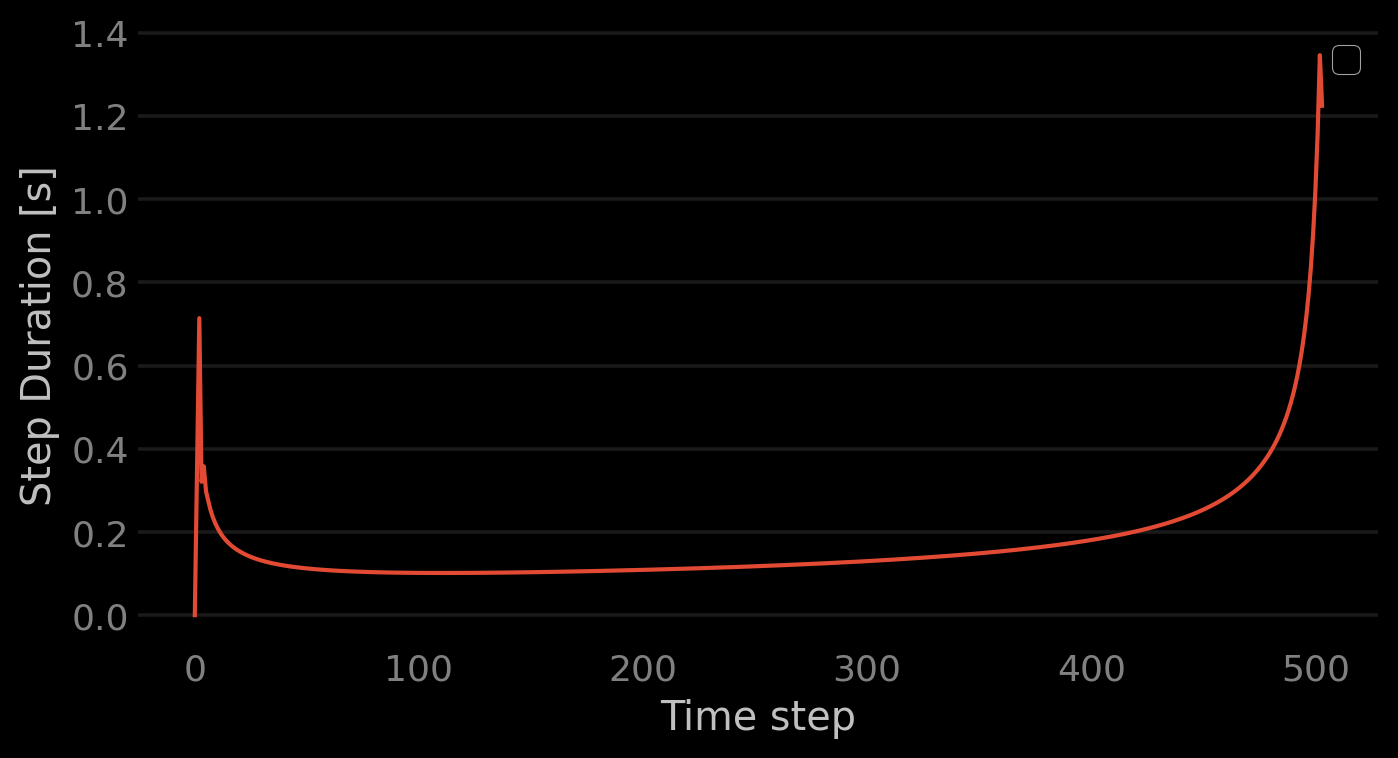

In [380]:
fig, ax = plt.subplots()
# for i in range(n_trajectories):
i = 1
ax.plot(dts[i, :stop[i]])
ax.legend()
ax.set(xlabel='Time step', ylabel='Step Duration [s]')

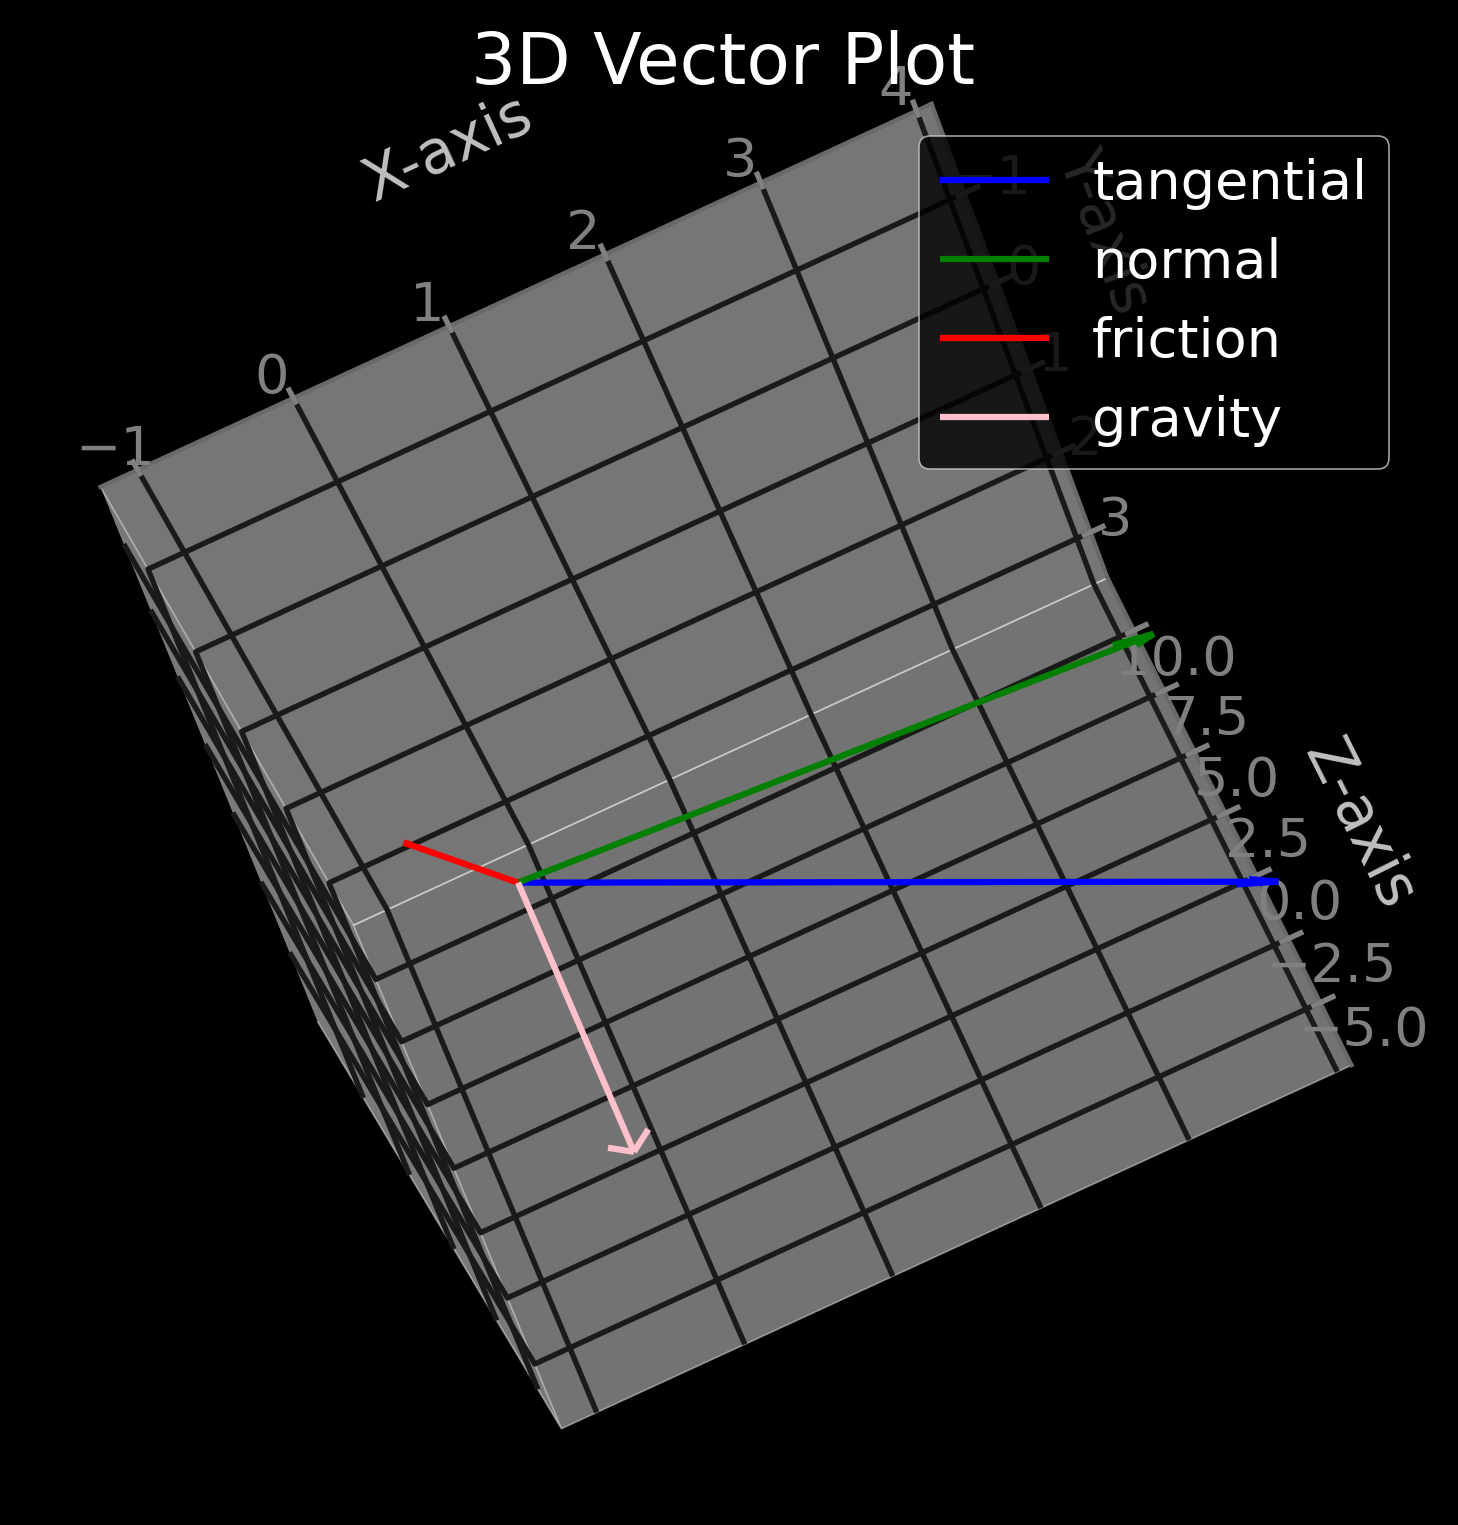

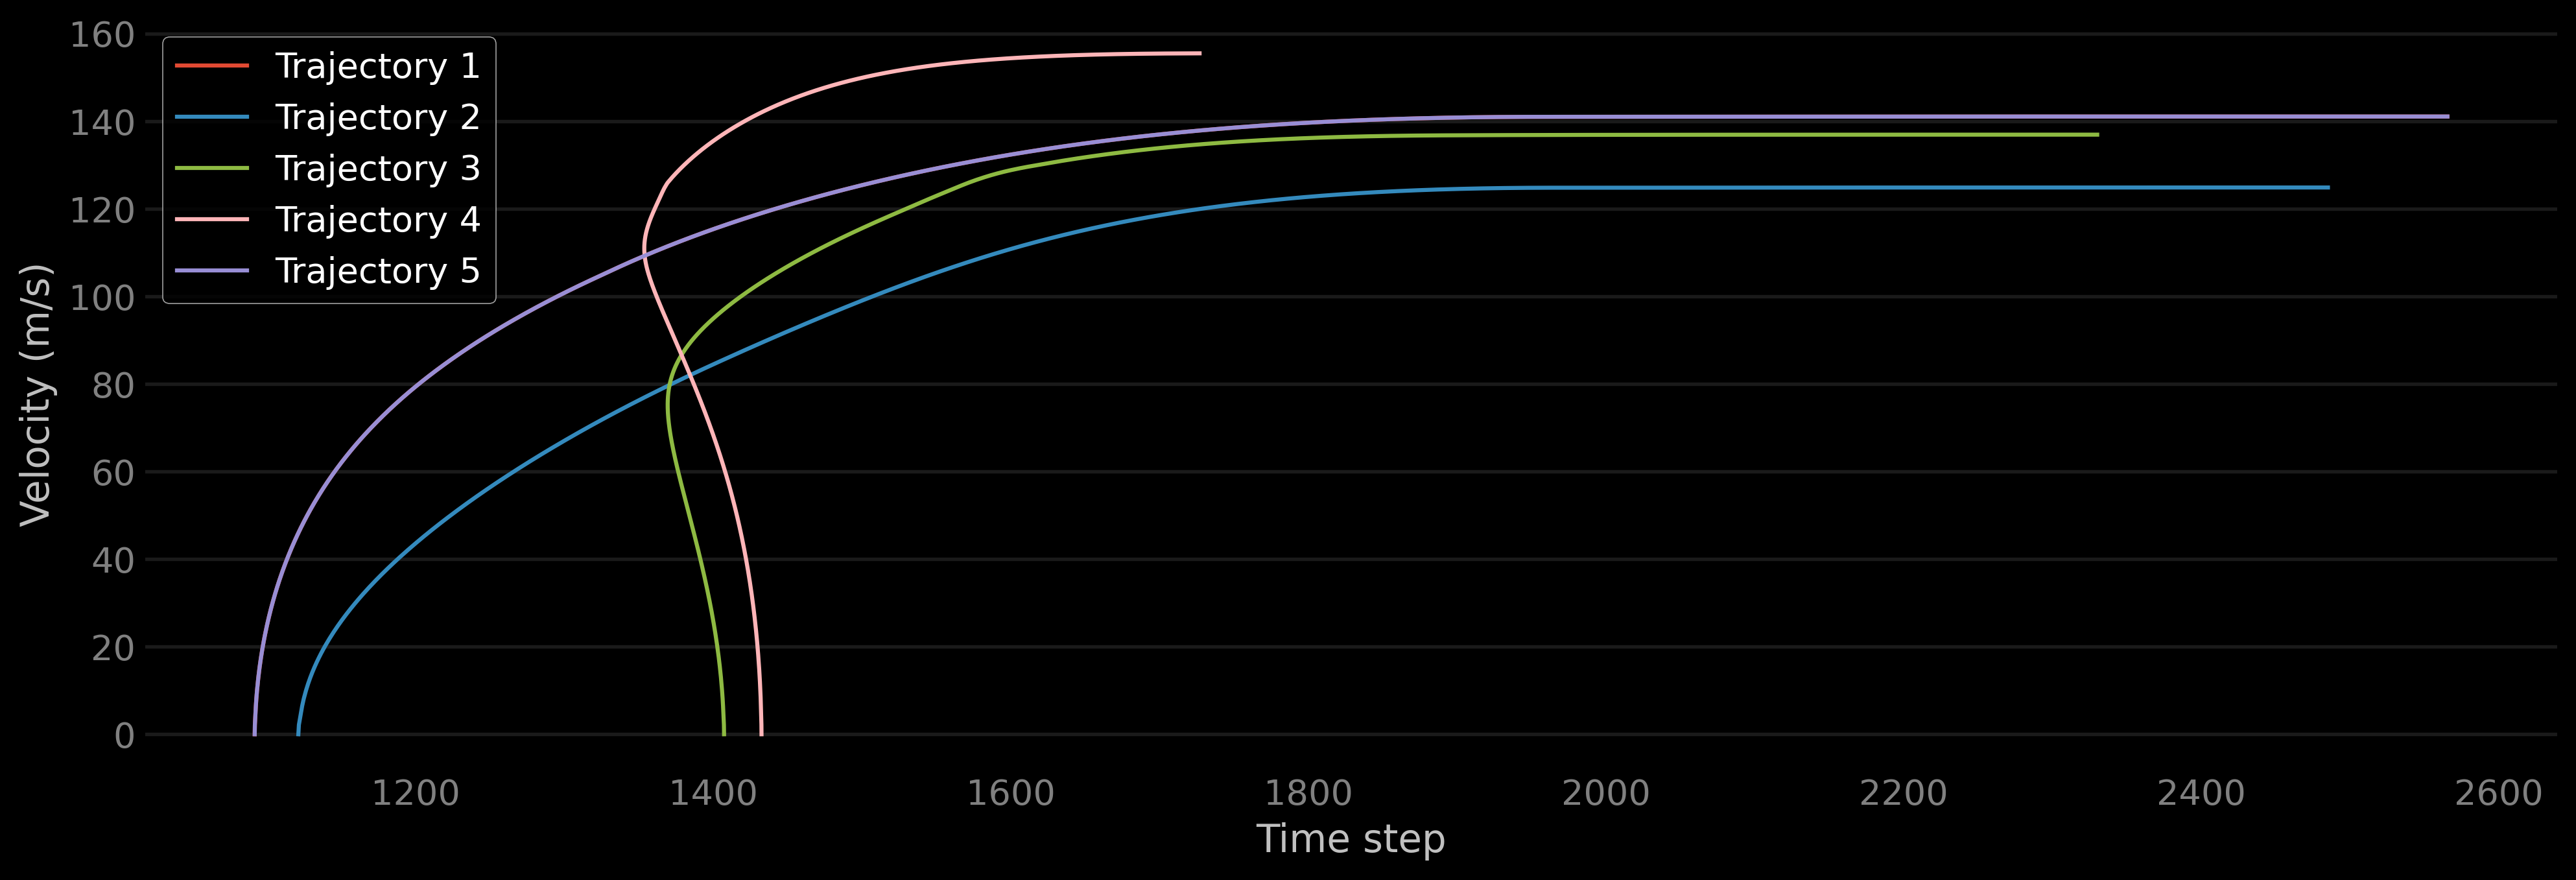

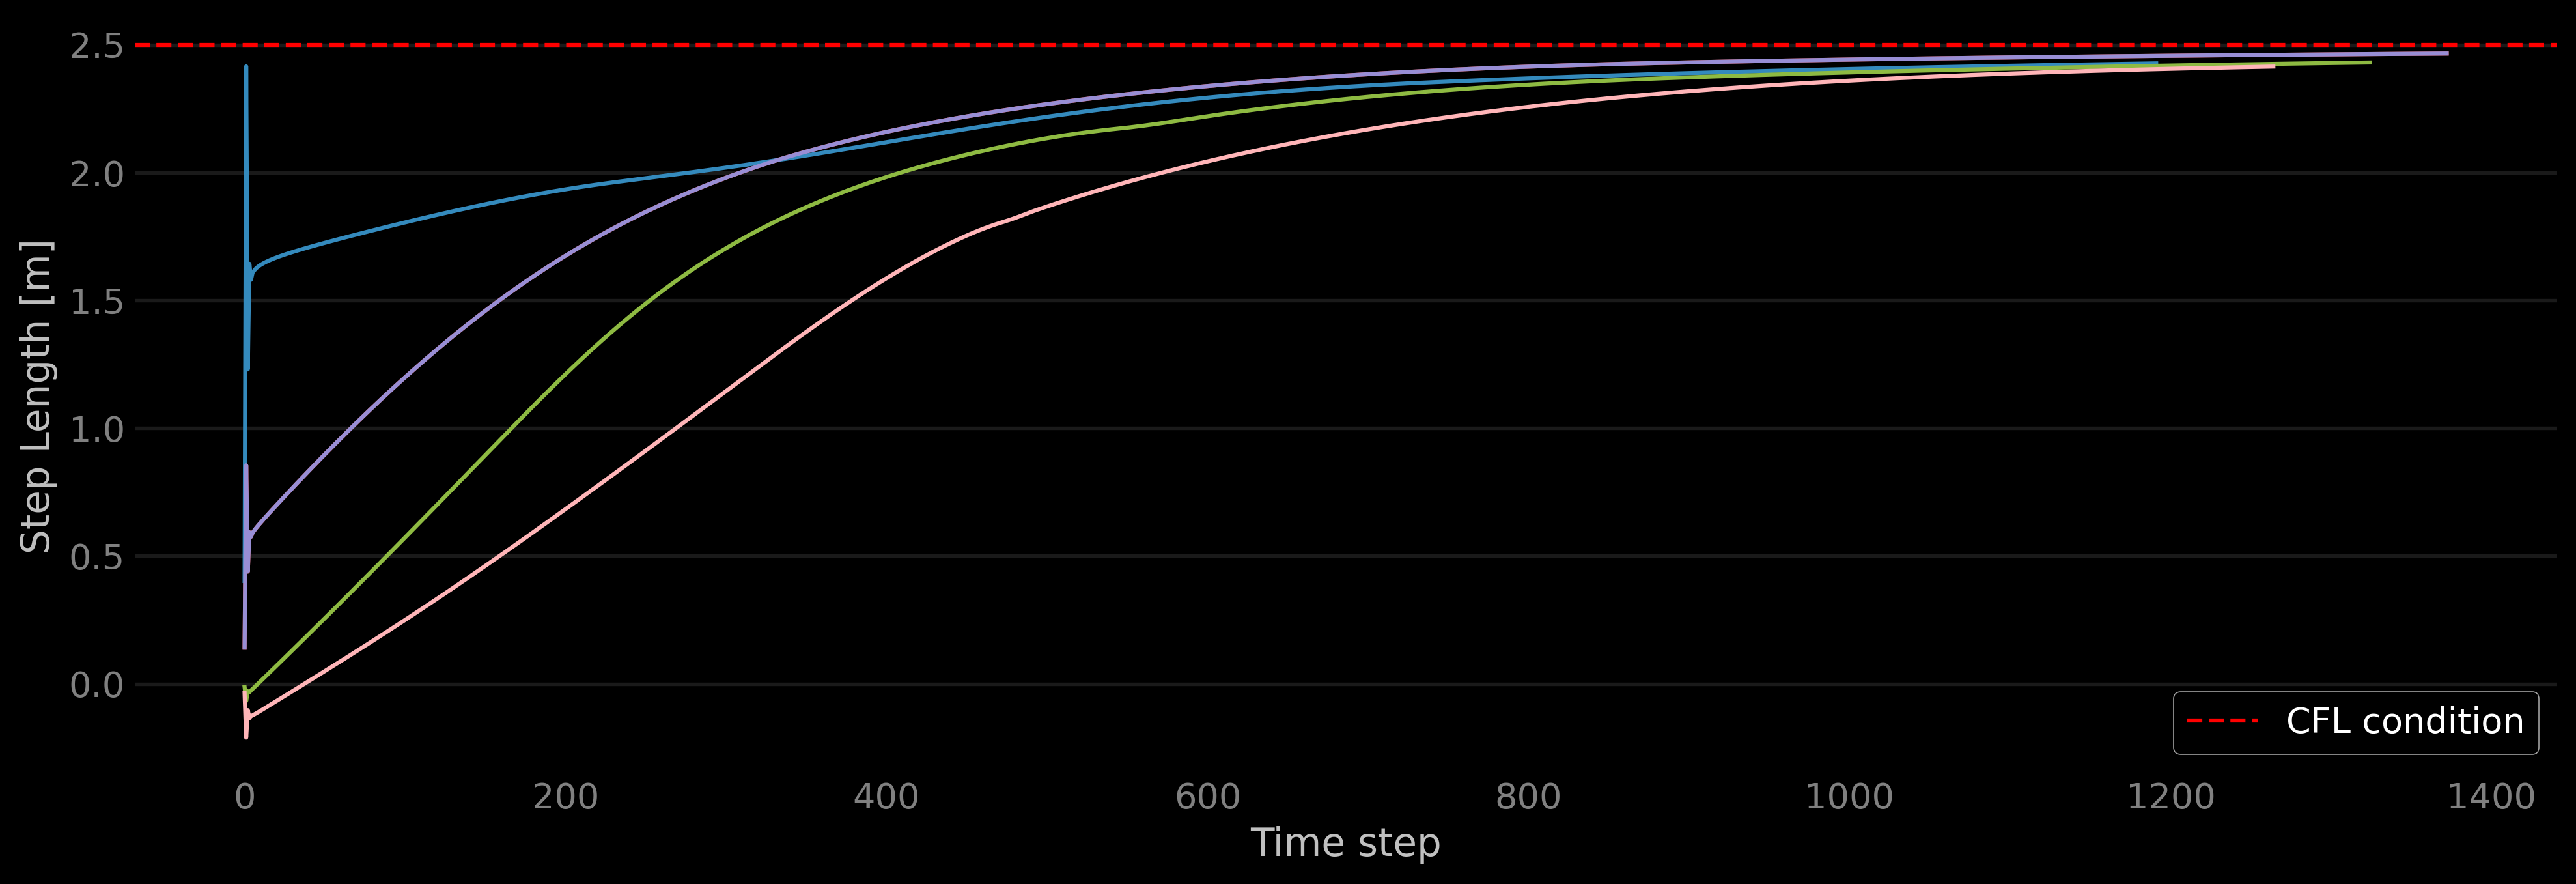

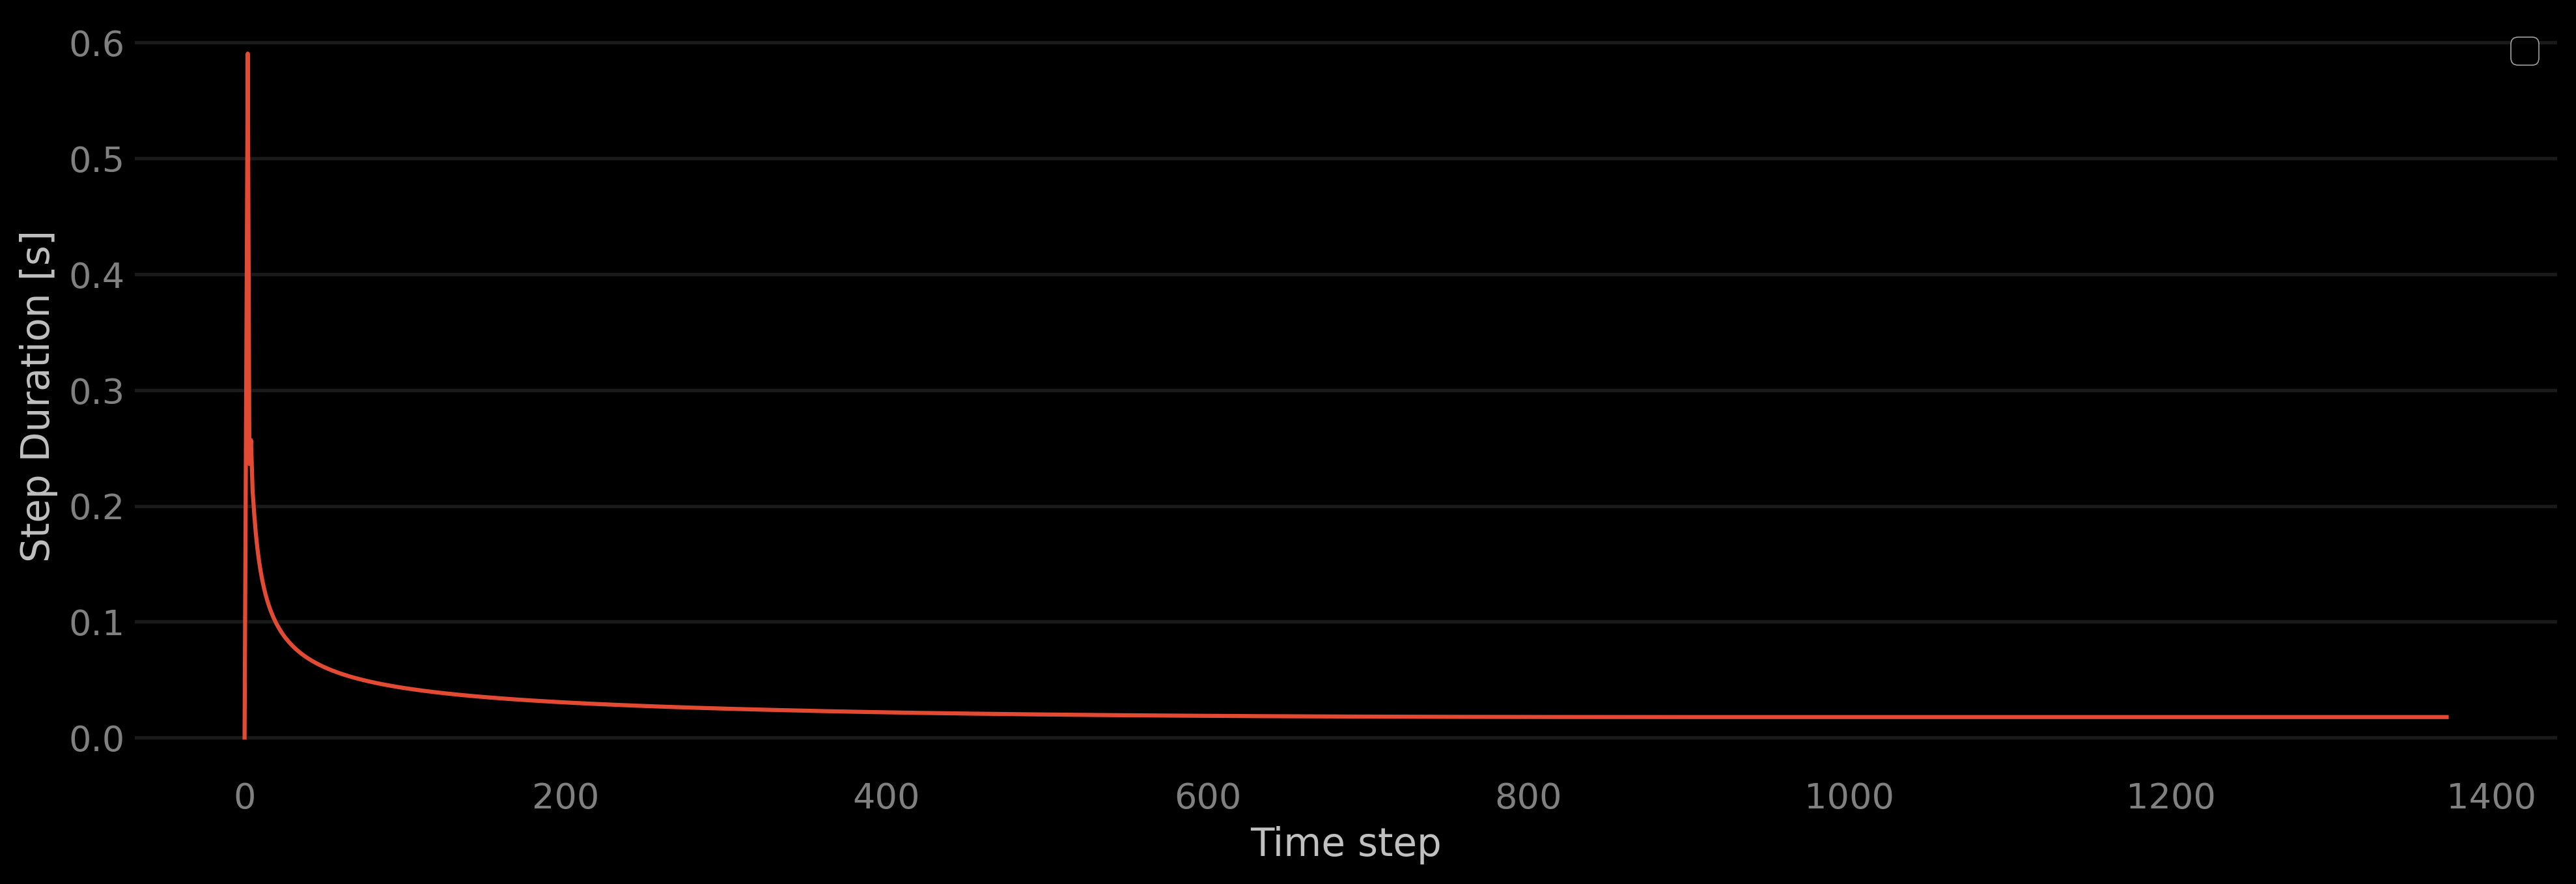

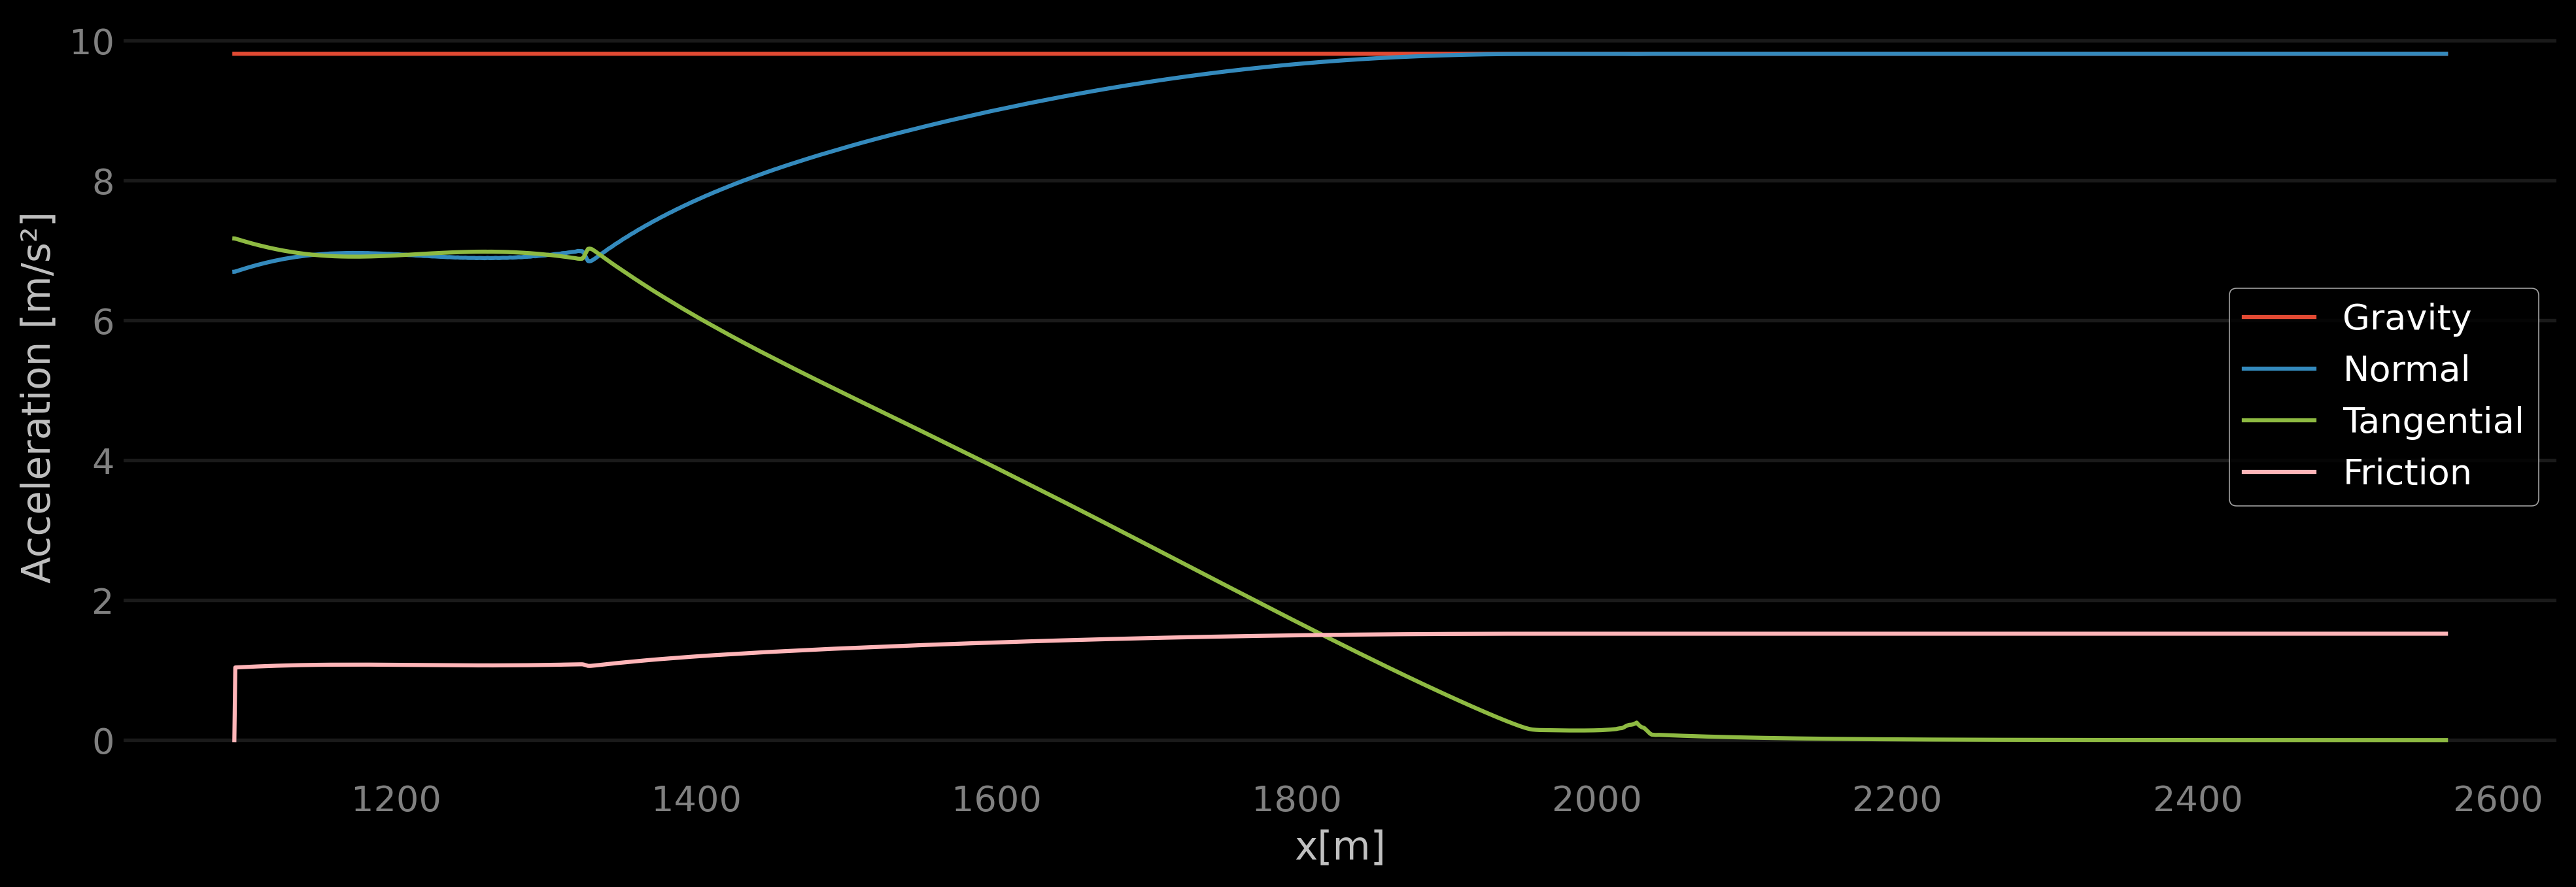

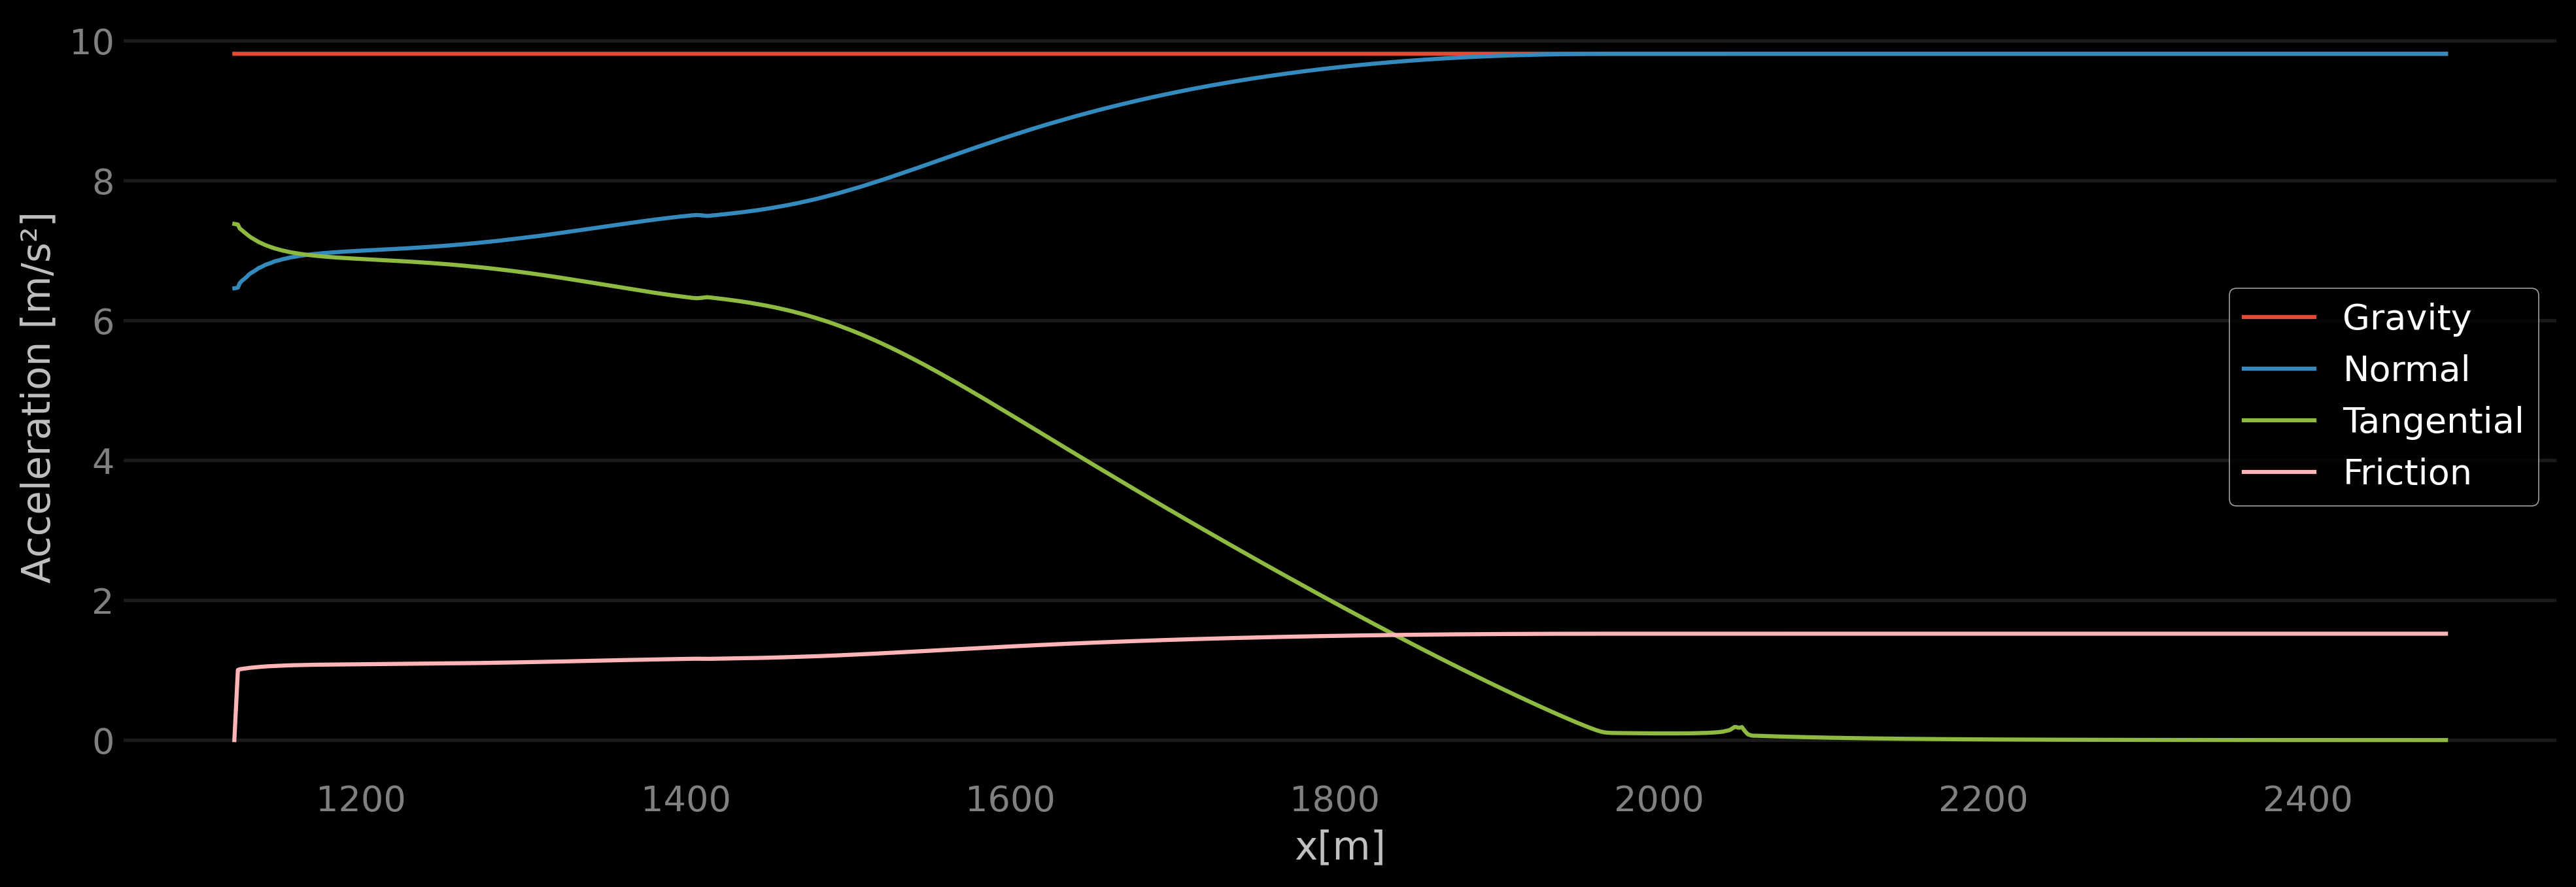

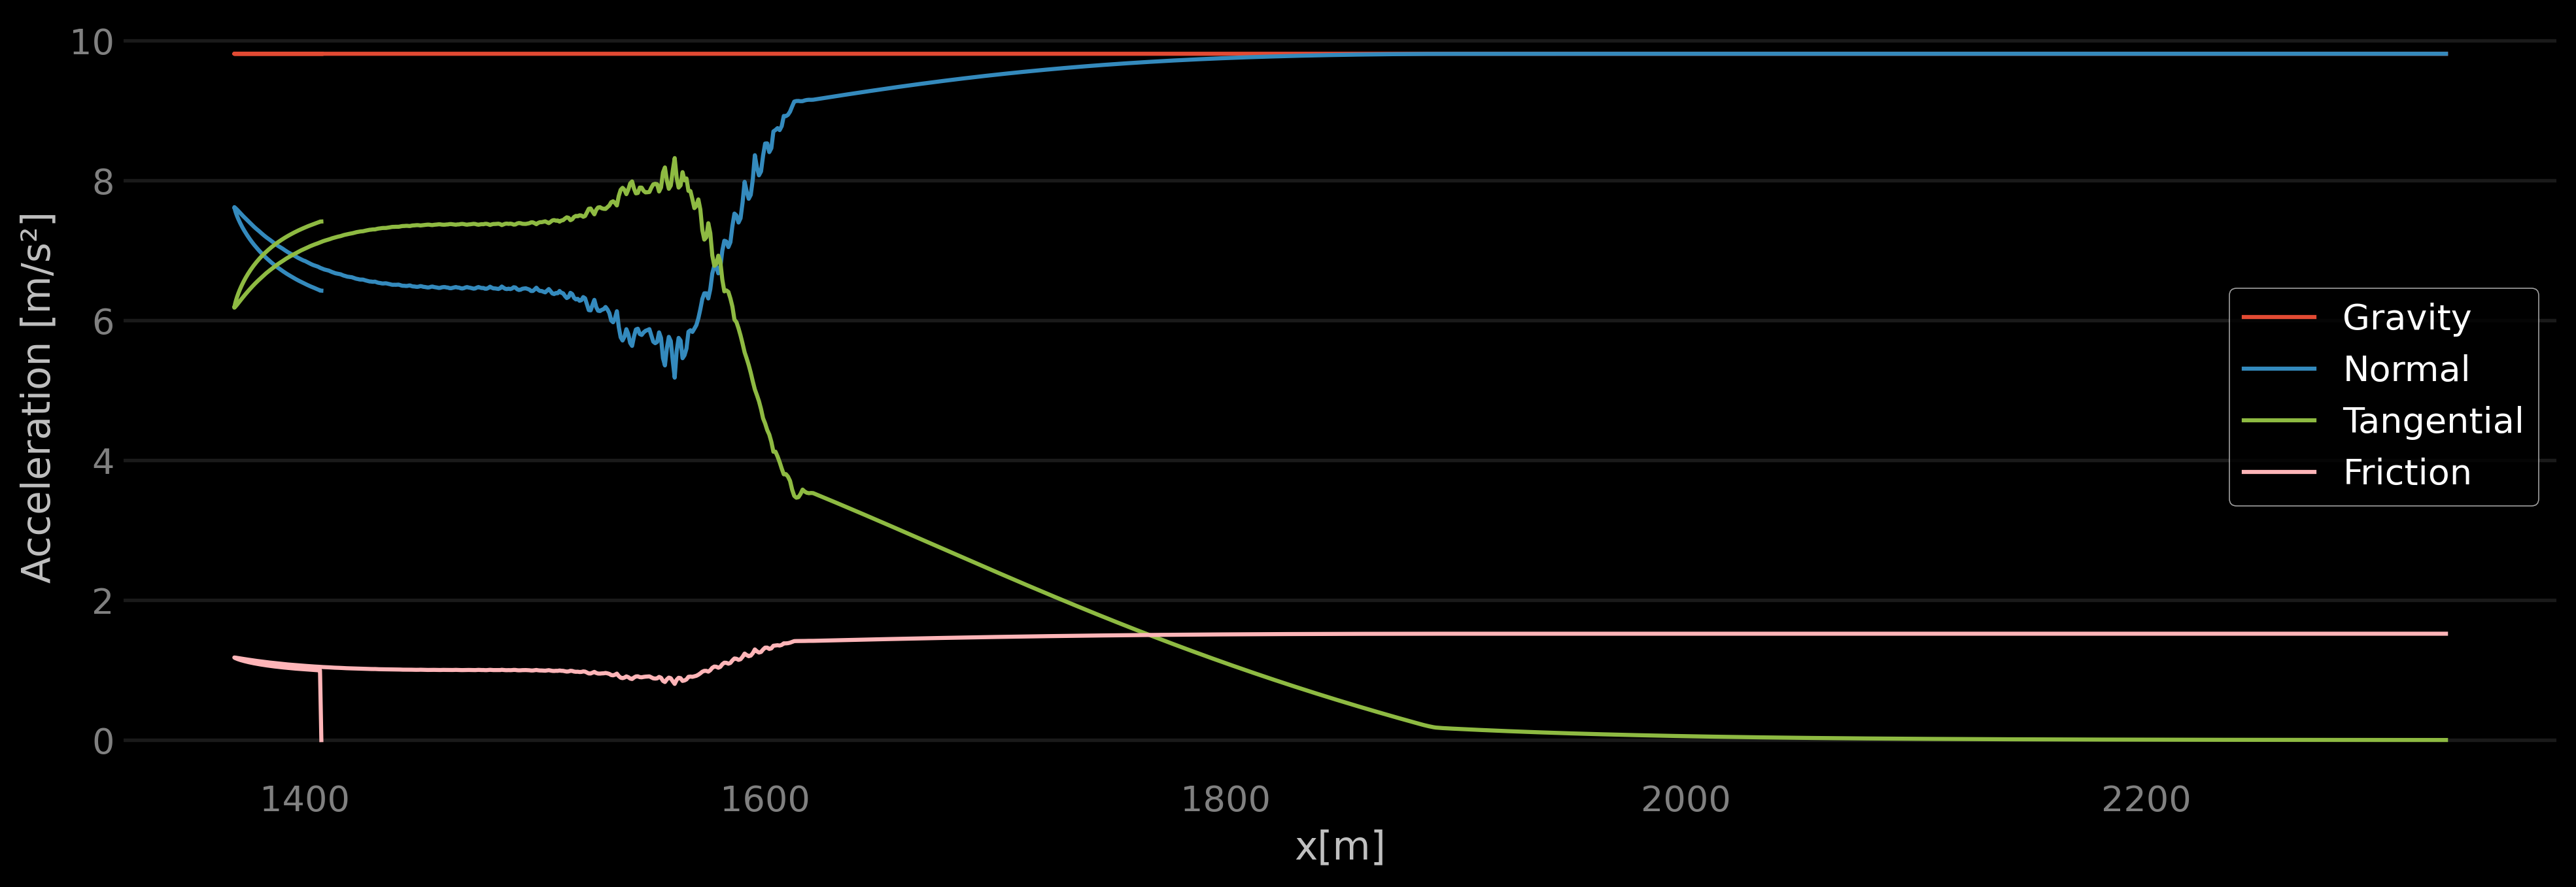

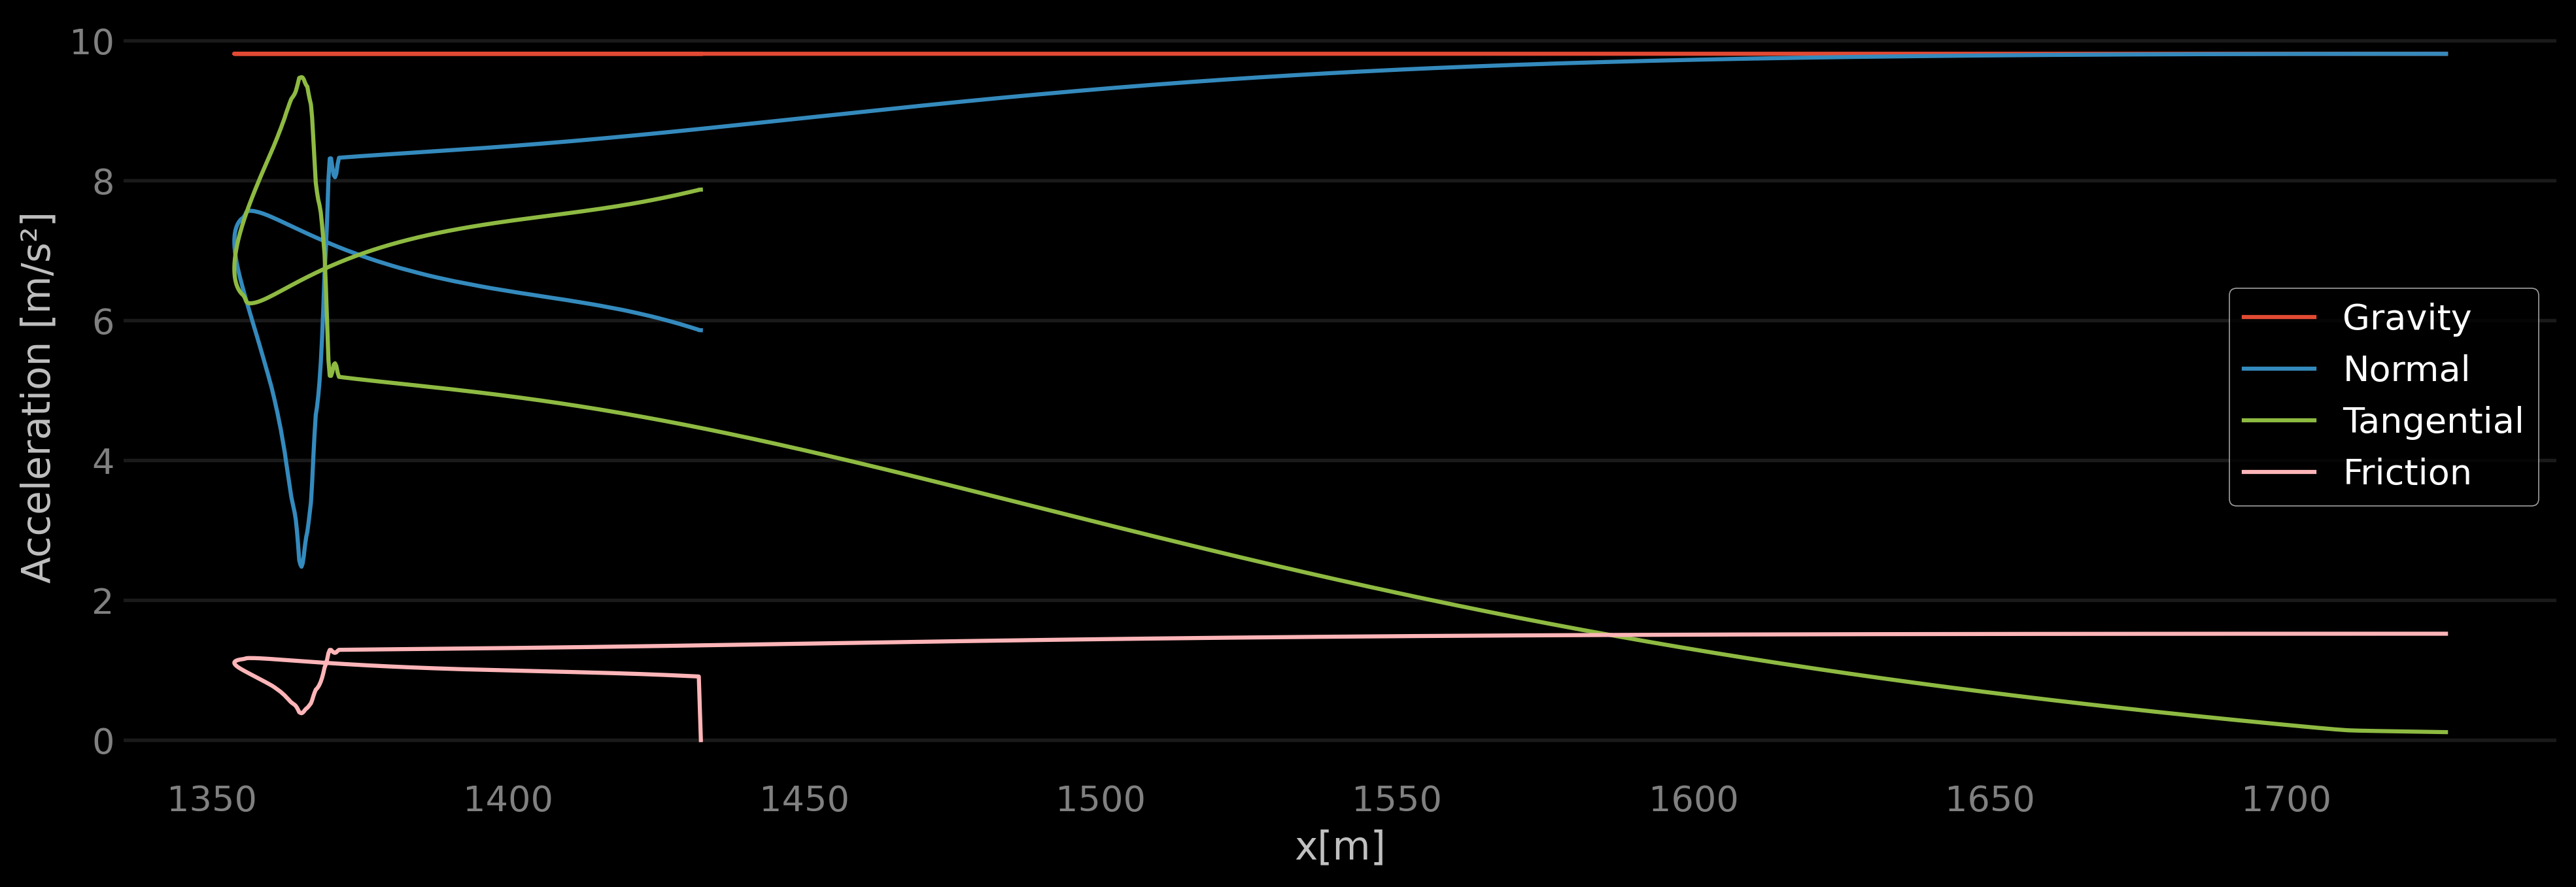

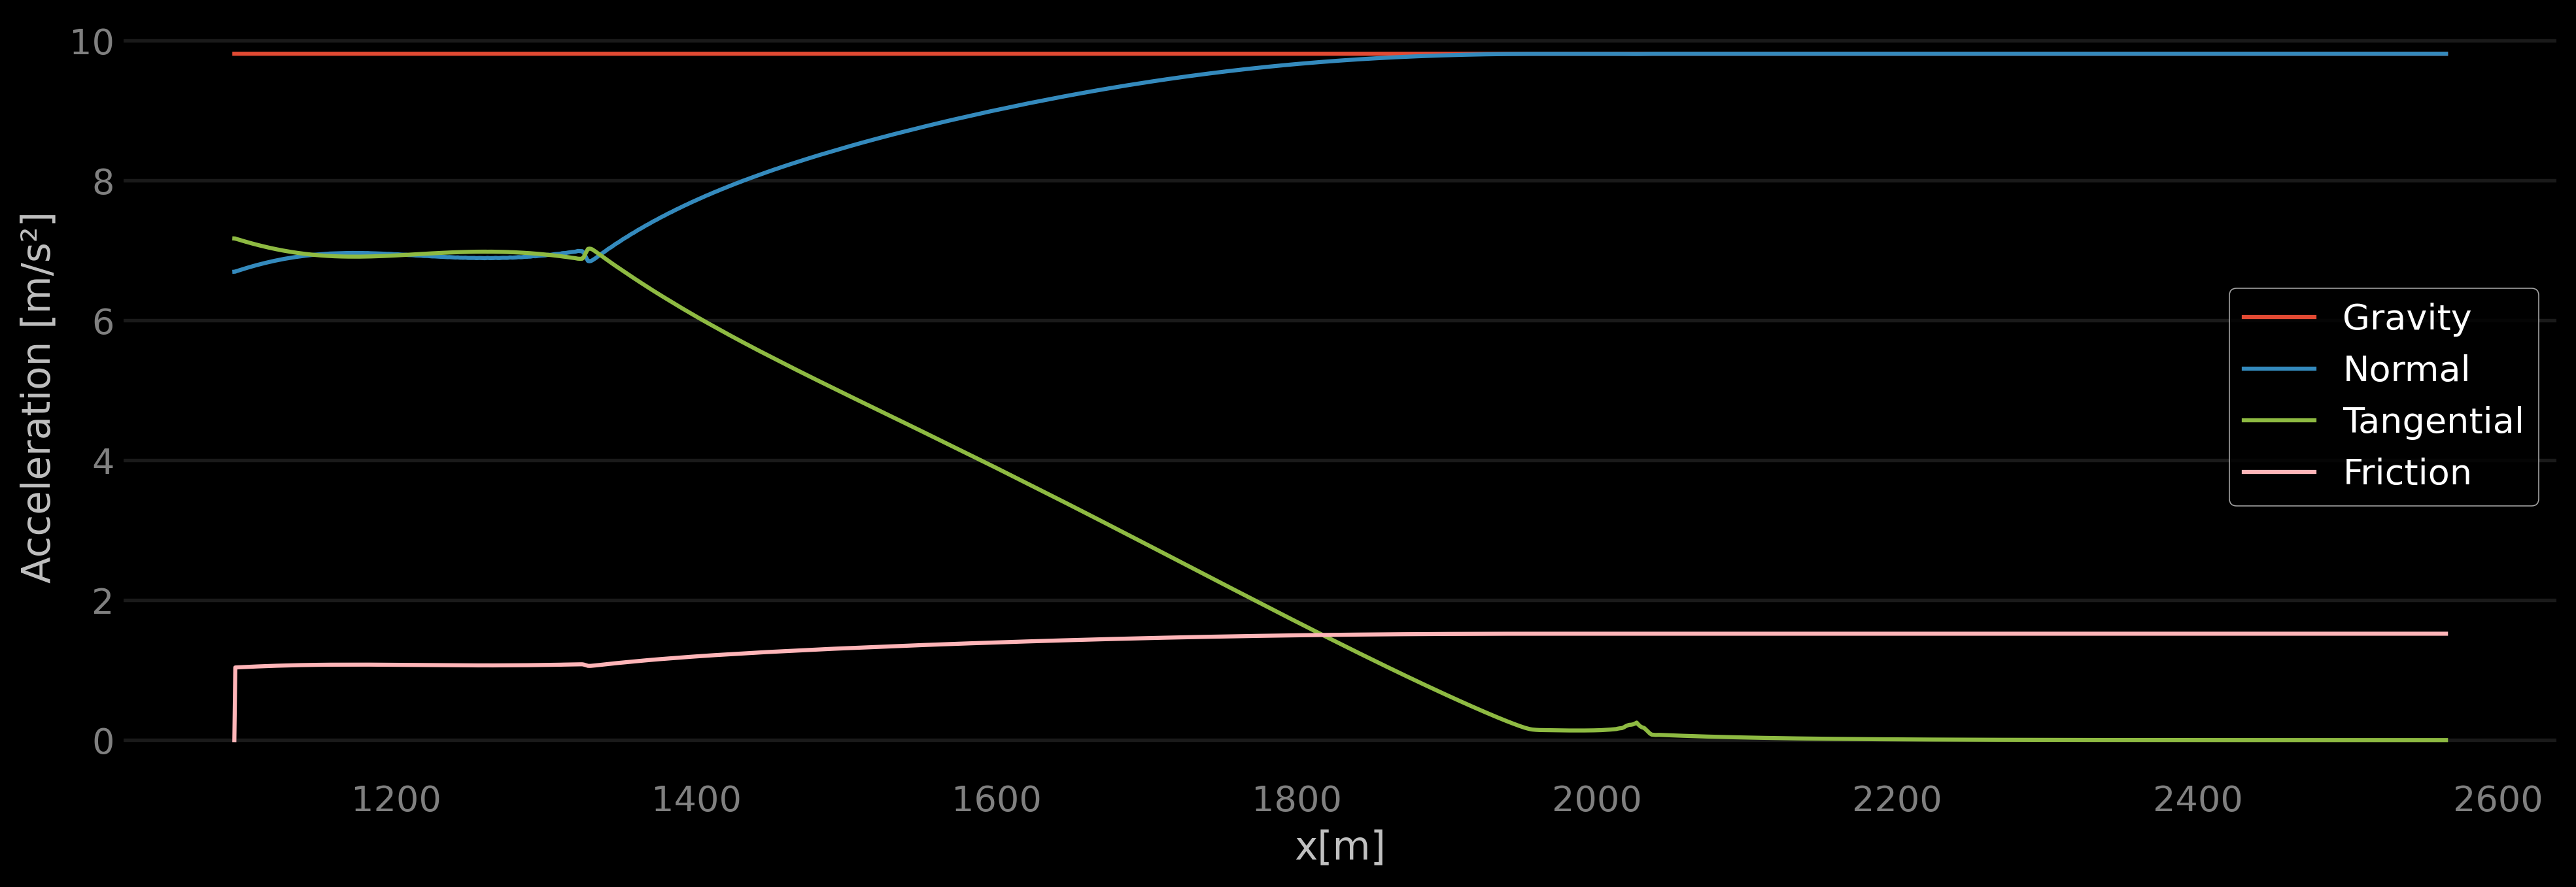

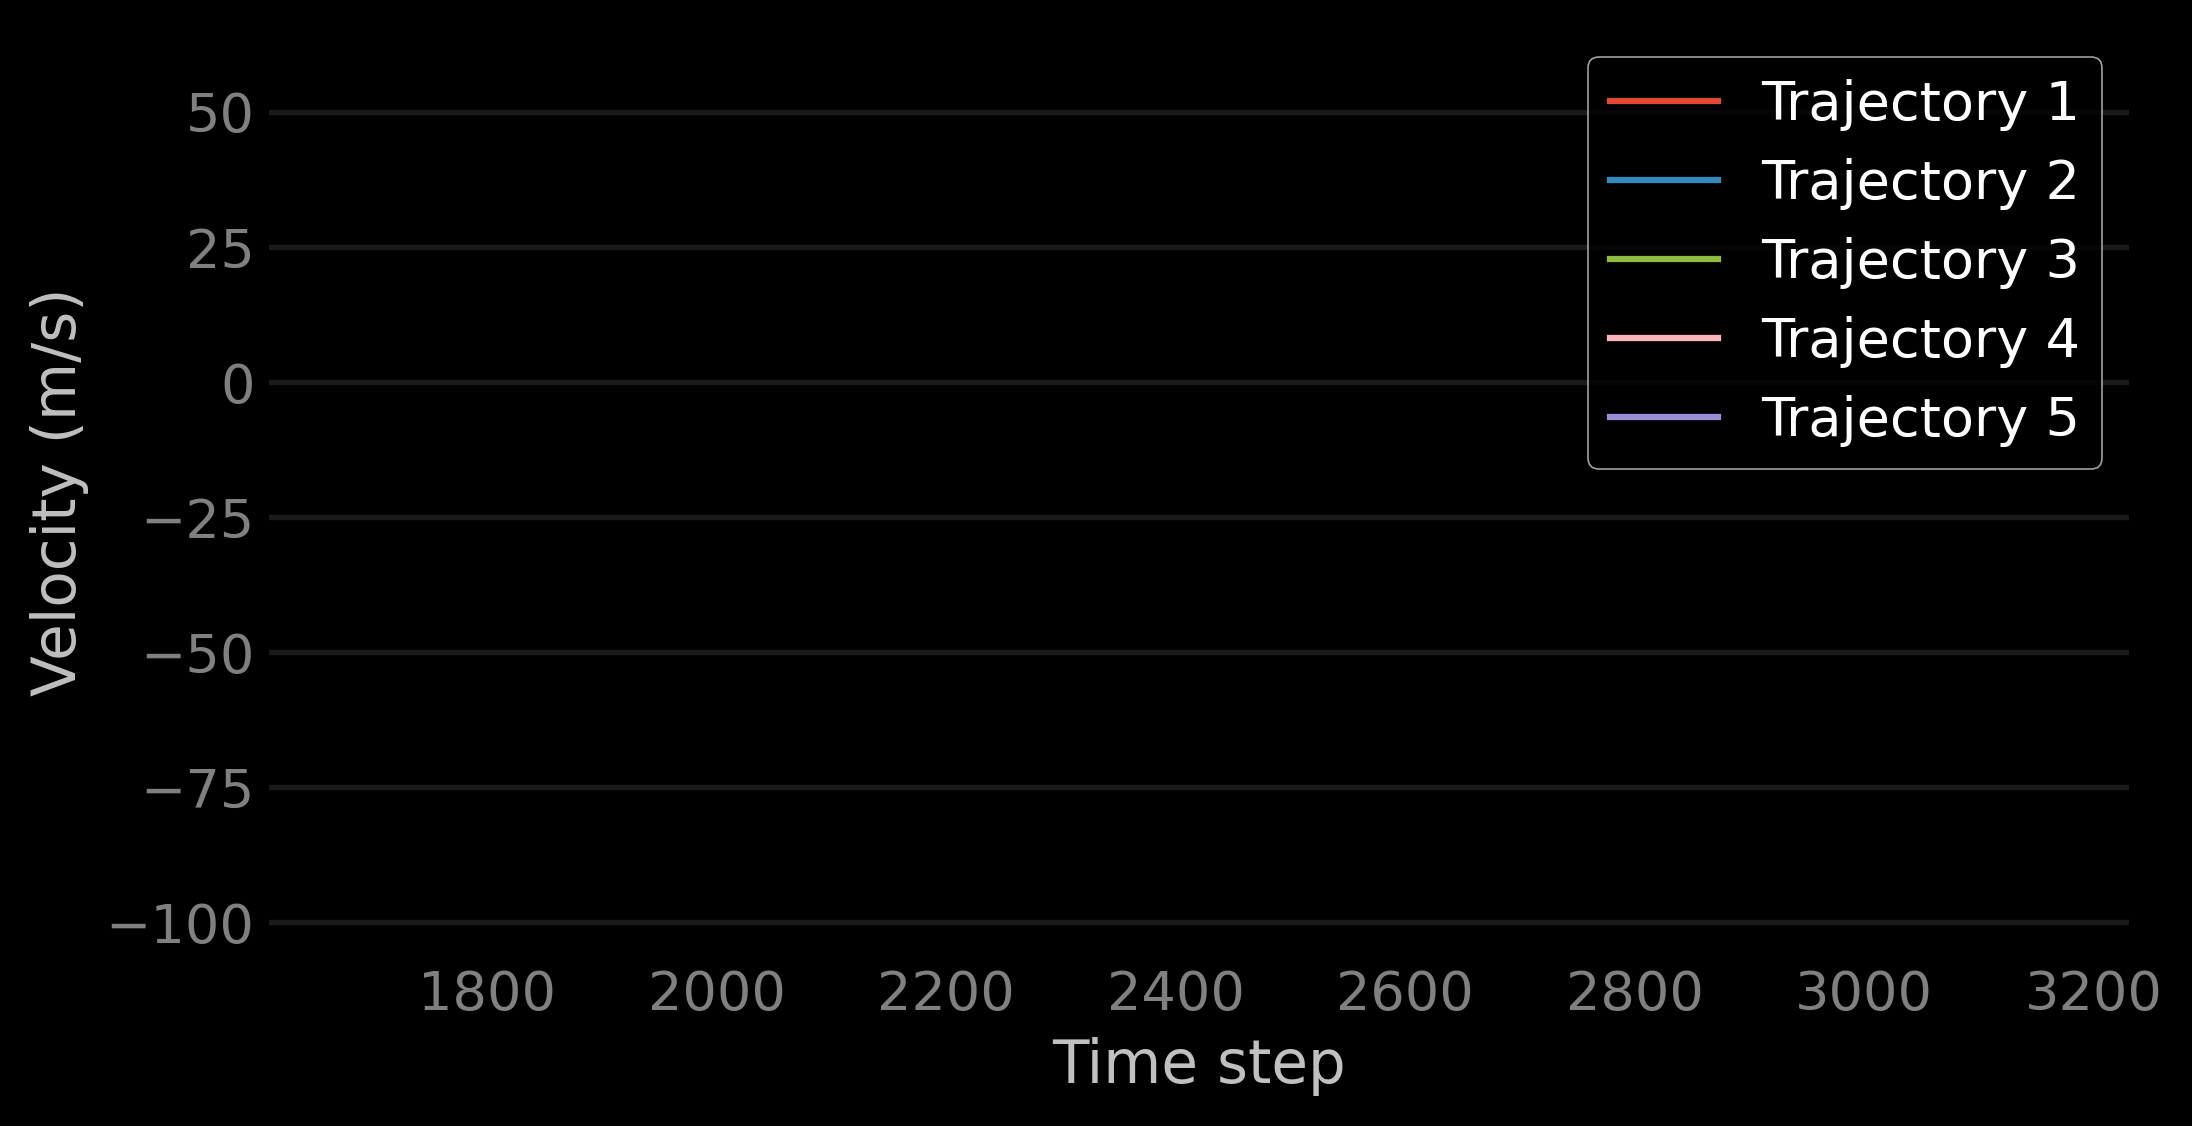

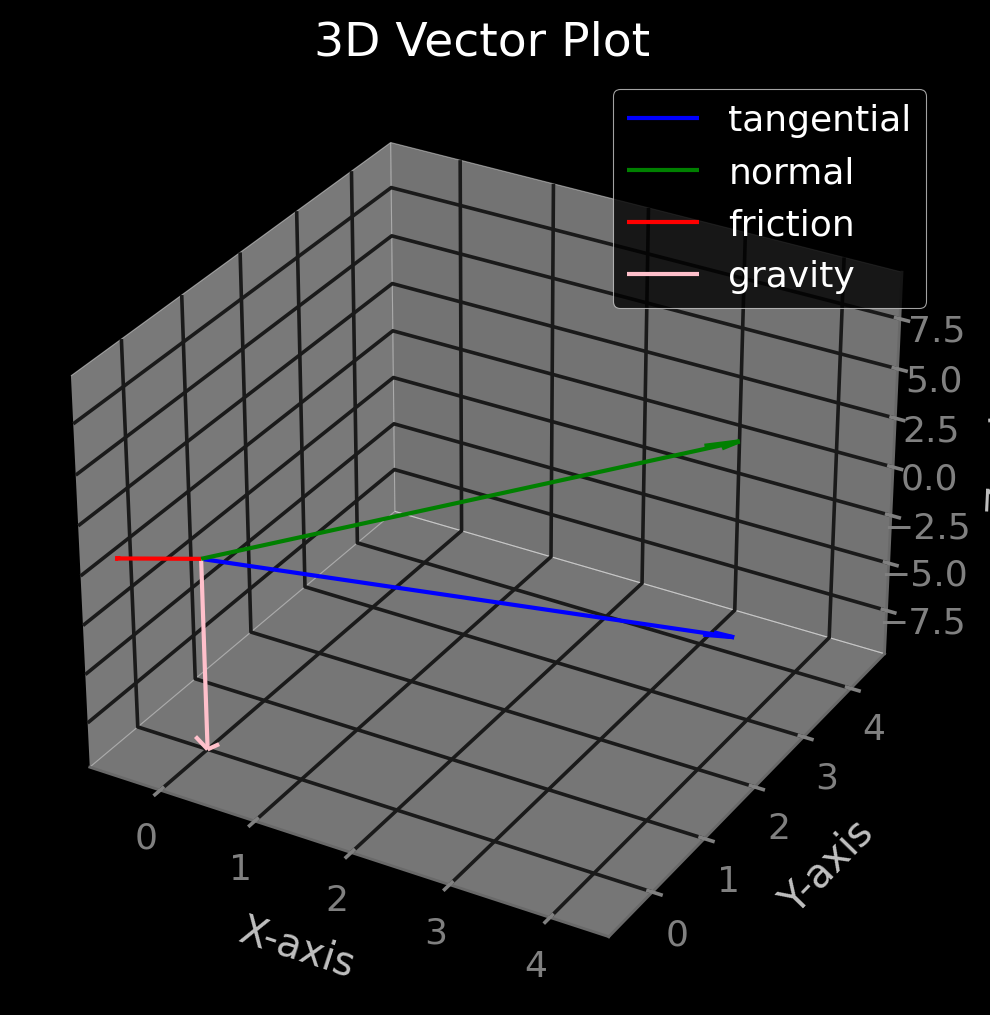

array([4.12939627, 2.41113323, 5.99266505])

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
# Example data: starting points and vector components
origin = np.array([[0, 0, 0], [1, 1, 1]])  # Starting points of vectors
vectors = np.array([[1, 2, 3], [-1, -2, -1]])  # Vector components (dx, dy, dz)

# Extract components for plotting
x, y, z = origin[:, 0], origin[:, 1], origin[:, 2]  # Starting points
u, v, w = vectors[:, 0], vectors[:, 1], vectors[:, 2]  # Vector components

# Create a 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
j=0
x_min = min(a_ts[j, :, 0].min(), a_ns[j, :, 0].min(), a_fs[j, :, 0].min(), a_gs[j, :, 0].min())
x_max = max(a_ts[j, :, 0].max(), a_ns[j, :, 0].max(), a_fs[j, :, 0].max(), a_gs[j, :, 0].max())
y_min = min(a_ts[j, :, 1].min(), a_ns[j, :, 1].min(), a_fs[j, :, 1].min(), a_gs[j, :, 1].min())
y_max = max(a_ts[j, :, 1].max(), a_ns[j, :, 1].max(), a_fs[j, :, 1].max(), a_gs[j, :, 1].max())
z_min = min(a_ts[j, :, 2].min(), a_ns[j, :, 2].min(), a_fs[j, :, 2].min(), a_gs[j, :, 2].min())
z_max = max(a_ts[j, :, 2].max(), a_ns[j, :, 2].max(), a_fs[j, :, 2].max(), a_gs[j, :, 2].max())

i = 400
# Plot vectors using quiver
x,y,z = [0,0,0]
u,v,w = a_ts[0, i, :]
ax.quiver(x,y,z, u,v,w, color='blue', label="tangential", arrow_length_ratio=0.05)
u,v,w = a_ns[0, i, :]
ax.quiver(x,y,z, u,v,w, color='green', label="normal", arrow_length_ratio=0.05)
u,v,w = a_fs[0, i, :]
ax.quiver(x,y,z, u,v,w, color='red', label="friction", arrow_length_ratio=0.05)
u,v,w = a_gs[0, i, :]
ax.quiver(x,y,z, u,v,w, color='pink', label="gravity", arrow_length_ratio=0.05)


# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
ax.set_zlim([z_min, z_max])
ax.set_title('3D Vector Plot')
ax.legend()

plt.show()
a_ns[0, i, :]

In [58]:
import plotly.graph_objects as go
import numpy as np

# Example data
x, y, z = [0], [0], [0]  # Starting points for all vectors
u, v, w = a_ts[0, i, :]  # Tangential vector components
u_n, v_n, w_n = a_ns[0, i, :]  # Normal vector components
u_f, v_f, w_f = a_fs[0, i, :]  # Friction vector components
u_g, v_g, w_g = a_gs[0, i, :]  # Gravity vector components

# Create the figure
fig = go.Figure()


# Add normal vector
fig.add_trace(go.Cone(
    x=[u_n], y=[v_n], z=[w_n],
    u=[u_n], v=[v_n], w=[w_n],
    colorscale=[[0, 'green'], [1, 'green']],
    # sizemode="absolute",
    # sizeref=2,
    name="Normal"
))

# Add friction vector
fig.add_trace(go.Cone(
    x=[u_f], y=[v_f], z=[w_f],
    u=[u_f], v=[v_f], w=[w_f],
    colorscale=[[0, 'red'], [1, 'red']],
    # sizemode="absolute",
    # sizeref=2,
    name="Friction"
))

# Add gravity vector
fig.add_trace(go.Cone(
    x=[u_g], y=[v_g], z=[w_g],
    u=[u_g], v=[v_g], w=[w_g],
    colorscale=[[0, 'purple'], [1, 'purple']],
    # sizemode="absolute",
    # sizeref=2,
    name="Gravity"
))
# Add tangential vector
fig.add_trace(go.Cone(
    x=[u], y=[v], z=[w],
    u=[u], v=[v], w=[w],
    colorscale=[[0, 'blue'], [1, 'blue']],
    # sizemode="absolute",
    # sizeref=2,
    name="Tangential"
))
fig.add_trace(go.Scatter3d(
    x=[0, u], y=[0, v], z=[0, w],
    mode='lines',
    marker=dict(size=5, color='blue'),
    name="Tangential"
))
fig.add_trace(go.Scatter3d(
    x=[0, u_g], y=[0, v_g], z=[0, w_g],
    mode='lines',
    marker=dict(size=5, color='purple'),
    name="Gravity"
))
fig.add_trace(go.Scatter3d(
    x=[0, u_f], y=[0, v_f], z=[0, w_f],
    mode='lines',
    marker=dict(size=5, color='red'),
    name="Friction"
))
fig.add_trace(go.Scatter3d(
    x=[0, u_n], y=[0, v_n], z=[0, w_n],
    mode='lines',
    marker=dict(size=5, color='green'),
    name="Normal"
))
fig.add_trace(go.Scatter3d(
    x=[0], y=[0], z=[0],
    mode='markers',
    marker=dict(size=5, color='black'),
    name="0"
))

# Set axis limits
fig.update_layout(
    scene=dict(
        # xaxis=dict(range=[x_min, x_max], title="X-axis"),
        # yaxis=dict(range=[y_min, y_max], title="Y-axis"),
        # zaxis=dict(range=[z_min, z_max], title="Z-axis"),
    ),
    title="3D Vector Plot",
    legend=dict(x=0.1, y=0.9)
)

# Show the plot
fig.show()

In [92]:
import plotly.graph_objects as go
import numpy as np

# Example data
j = 0
x, y, z = [0], [0], [0]  # Starting points for all vectors
u, v, w = a_ts[0, i, :]  # Tangential vector components
# u_n, v_n, w_n = a_ns[0]  # Normal vector components
u_f, v_f, w_f = a_fs[0, i, :]  # Friction vector components
u_g, v_g, w_g = a_gs[0, i, :]  # Gravity vector components

x_min = min(a_ts[j, :, 0].min(), a_ns[j, :, 0].min(), a_fs[j, :, 0].min(), a_gs[j, :, 0].min())
x_max = max(a_ts[j, :, 0].max(), a_ns[j, :, 0].max(), a_fs[j, :, 0].max(), a_gs[j, :, 0].max())
y_min = min(a_ts[j, :, 1].min(), a_ns[j, :, 1].min(), a_fs[j, :, 1].min(), a_gs[j, :, 1].min())
y_max = max(a_ts[j, :, 1].max(), a_ns[j, :, 1].max(), a_fs[j, :, 1].max(), a_gs[j, :, 1].max())
z_min = min(a_ts[j, :, 2].min(), a_ns[j, :, 2].min(), a_fs[j, :, 2].min(), a_gs[j, :, 2].min())
z_max = max(a_ts[j, :, 2].max(), a_ns[j, :, 2].max(), a_fs[j, :, 2].max(), a_gs[j, :, 2].max())

import plotly.graph_objects as go
import numpy as np

# Example data
j = 0  # Example trajectory index
stop = [10]  # Example stop array
a_ns = np.random.rand(1, 10, 3)  # Example 3D vector data for normal forces

# Create the figure
fig = go.Figure(
    # Define frames for animation
    frames=[
        go.Frame(
            data=[
                go.Cone(
                    x=[a_ns[j, k, 0]], y=[a_ns[j, k, 1]], z=[a_ns[j, k, 2]],  # Vector components
                    u=[a_ns[j, k, 0]], v=[a_ns[j, k, 1]], w=[a_ns[j, k, 2]],  # Vector components
                    name="Normal_"
                ),
                # go.Cone(
                #     x=[a_fs[j, k, 0]], y=[a_fs[j, k, 1]], z=[a_fs[j, k, 2]],  # Starting point of the vector
                #     u=[a_fs[j, k, 0]], v=[a_fs[j, k, 1]], w=[a_fs[j, k, 2]],  # Vector components
                #     name="Friction_"
                # ),
                # go.Cone(
                #     x=[a_ts[j, k, 0]], y=[a_ts[j, k, 1]], z=[a_ts[j, k, 2]],  # Vector components
                #     u=[a_ts[j, k, 0]], v=[a_ts[j, k, 1]], w=[a_ts[j, k, 2]],  # Vector components
                #     name="Tangential_"
                # ),
                # go.Cone(
                #     x=[a_gs[j, k, 0]], y=[a_gs[j, k, 1]], z=[a_gs[j, k, 2]],  # Gravity vector components
                #     u=[a_gs[j, k, 0]], v=[a_gs[j, k, 1]], w=[a_gs[j, k, 2]],  # Gravity vector components
                #     name="Gravity_"
                # ),
                go.Scatter3d(
                    x=[0, a_ns[j, k, 0]], y=[0, a_ns[j, k, 1]], z=[0, a_ns[j, k, 2]],
                    marker=dict(size=5, color='green'),
                    name="Normal"
                ),
                # go.Scatter3d(
                #     x=[0, a_ts[j, k, 0]], y=[0, a_ts[j, k, 1]], z=[0, a_ts[j, k, 2]],
                #     marker=dict(size=5, color='blue'),
                #     name="Tangential"
                # ),
                go.Scatter3d(
                    x=[0, a_fs[j, k, 0]], y=[0, a_fs[j, k, 1]], z=[0, a_fs[j, k, 2]],
                    marker=dict(size=5, color='red'),
                    name="Friction"
                ),
                # go.Scatter3d(
                #     x=[0, a_gs[j, k, 0]], y=[0, a_gs[j, k, 1]], z=[0, a_gs[j, k, 2]],
                #     marker=dict(size=5, color='purple'),
                #     name="Gravity"
                # ),
            ],
            name=f"Frame {k}"  # Name each frame
        )
        for k in range(stop[j])  # Iterate over the range of stop[j]
    ],

    # Define layout
    layout=go.Layout(
        
        hovermode="closest",
        scene=dict(
            xaxis=dict(range=[x_min, x_max], title="X-axis"),  # Set x-axis limits
            yaxis=dict(range=[y_min, y_max], title="Y-axis"),  # Set y-axis limits
            zaxis=dict(range=[z_min, z_max], title="Z-axis"),  # Set z-axis limits
        ),
        updatemenus=[
            dict(
                type="buttons",
                showactive=False,
                buttons=[
                    dict(
                        label="Play",
                        method="animate",
                        args=[None, dict(frame=dict(duration=500, redraw=True), fromcurrent=False)]
                    ),
                    dict(
                        label="Pause",
                        method="animate",
                        args=[[None], dict(frame=dict(duration=0, redraw=False))]),
                ]
            )

        ]
    )        
)


# Add the initial frame

# Add normal vector
fig.add_trace(go.Cone(
    x=[u_n], y=[v_n], z=[w_n],
    u=[u_n], v=[v_n], w=[w_n],
    colorscale=[[0, 'green'], [1, 'green']],
    # sizemode="absolute",
    # sizeref=2,
    name="Normal_"
))

# # Add friction vector
# fig.add_trace(go.Cone(
#     x=[u_f], y=[v_f], z=[w_f],
#     u=[u_f], v=[v_f], w=[w_f],
#     colorscale=[[0, 'red'], [1, 'red']],
#     # sizemode="absolute",
#     # sizeref=2,
#     name="Friction_"
# ))

# # Add gravity vector
# fig.add_trace(go.Cone(
#     x=[u_g], y=[v_g], z=[w_g],
#     u=[u_g], v=[v_g], w=[w_g],
#     colorscale=[[0, 'purple'], [1, 'purple']],
#     # sizemode="absolute",
#     # sizeref=2,
#     name="Gravity_"
# ))
# # Add tangential vector
# fig.add_trace(go.Cone(
#     x=[u], y=[v], z=[w],
#     u=[u], v=[v], w=[w],
#     colorscale=[[0, 'blue'], [1, 'blue']],
#     # sizemode="absolute",
#     # sizeref=2,
#     name="Tangential_"
# ))
# fig.add_trace(go.Scatter3d(
#     x=[0, u], y=[0, v], z=[0, w],
#     mode='lines',
#     marker=dict(size=5, color='blue'),
#     name="Tangential"
# ))
# fig.add_trace(go.Scatter3d(
#     x=[0, u_g], y=[0, v_g], z=[0, w_g],
#     mode='lines',
#     marker=dict(size=5, color='purple'),
#     name="Gravity"
# ))
fig.add_trace(go.Scatter3d(
    x=[0, u_f], y=[0, v_f], z=[0, w_f],
    mode='lines',
    marker=dict(size=5, color='red'),
    name="Friction"
))
fig.add_trace(go.Scatter3d(
    x=[0, u_n], y=[0, v_n], z=[0, w_n],
    mode='lines',
    marker=dict(size=5, color='green'),
    name="Normal"
))
# fig.add_trace(go.Scatter3d(
#     x=[0], y=[0], z=[0],
#     mode='markers',
#     marker=dict(size=5, color='black'),
#     name="0"
# ))


# Add a slider for the animation
fig.update_layout(
    
        scene=dict(
            xaxis=dict(range=[x_min, x_max], title="X-axis"),  # Set x-axis limits
            yaxis=dict(range=[y_min, y_max], title="Y-axis"),  # Set y-axis limits
            zaxis=dict(range=[z_min, z_max], title="Z-axis"),  # Set z-axis limits
        ),
    sliders=[dict(
        steps=[
            dict(
                method="animate",
                args=[[f"Frame {k}"], dict(frame=dict(duration=500, redraw=True), mode="immediate")],
                label=f"Frame {k}"
            )
            for k in range(stop[j])
        ],
        transition=dict(duration=0),
        x=0.1,
        y=0,
        currentvalue=dict(font=dict(size=20), prefix="Frame: ", visible=True),
        len=0.9
    )]
)

# Show the plot
fig.show()

In [ ]:
import plotly.graph_objects as go
import numpy as np

# Generate example data for animation
n_frames = 20  # Number of frames
n_points = 10  # Number of points in each frame

# Create random 3D points for each frame
frames = []
for i in range(n_frames):
    x = np.random.rand(n_points) * 10
    y = np.random.rand(n_points) * 10
    z = np.random.rand(n_points) * 10
    frames.append(go.Frame(
        data=[go.Scatter3d(
            x=x, y=y, z=z,
            mode='markers',
            marker=dict(size=5, color=z, colorscale='Viridis'),
        )],
        name=f"Frame {i}"
    ))

# Create the initial frame
x_init = np.random.rand(n_points) * 10
y_init = np.random.rand(n_points) * 10
z_init = np.random.rand(n_points) * 10

# Create the figure
fig = go.Figure(
    data=[go.Scatter3d(
        x=x_init, y=y_init, z=z_init,
        mode='markers',
        marker=dict(size=5, color=z_init, colorscale='Viridis'),
    )],
    layout=go.Layout(
        title="3D Scatter Plot with Slider and Animation",
        scene=dict(
            xaxis=dict(range=[0, 10], title="X-axis"),
            yaxis=dict(range=[0, 10], title="Y-axis"),
            zaxis=dict(range=[0, 10], title="Z-axis"),
        ),
        updatemenus=[dict(
            type="buttons",
            showactive=False,
            buttons=[
                dict(label="Play",
                     method="animate",
                     args=[None, dict(frame=dict(duration=500, redraw=True), fromcurrent=True)]),
                dict(label="Pause",
                     method="animate",
                     args=[[None], dict(frame=dict(duration=0, redraw=False)])]
    )]
        )]
    ),
    frames=frames
)

# Add a slider
fig.update_layout(
    sliders=[dict(
        steps=[dict(method="animate",
                    args=[[f"Frame {i}"],
                          dict(frame=dict(duration=500, redraw=True), mode="immediate")],
                    label=f"Frame {i}") for i in range(n_frames)],
        transition=dict(duration=0),
        x=0.1,
        y=0,
        currentvalue=dict(font=dict(size=20), prefix="Frame: ", visible=True),
        len=0.9
    )]
)

# Show the plot
fig.show()

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (3356766190.py, line 51)

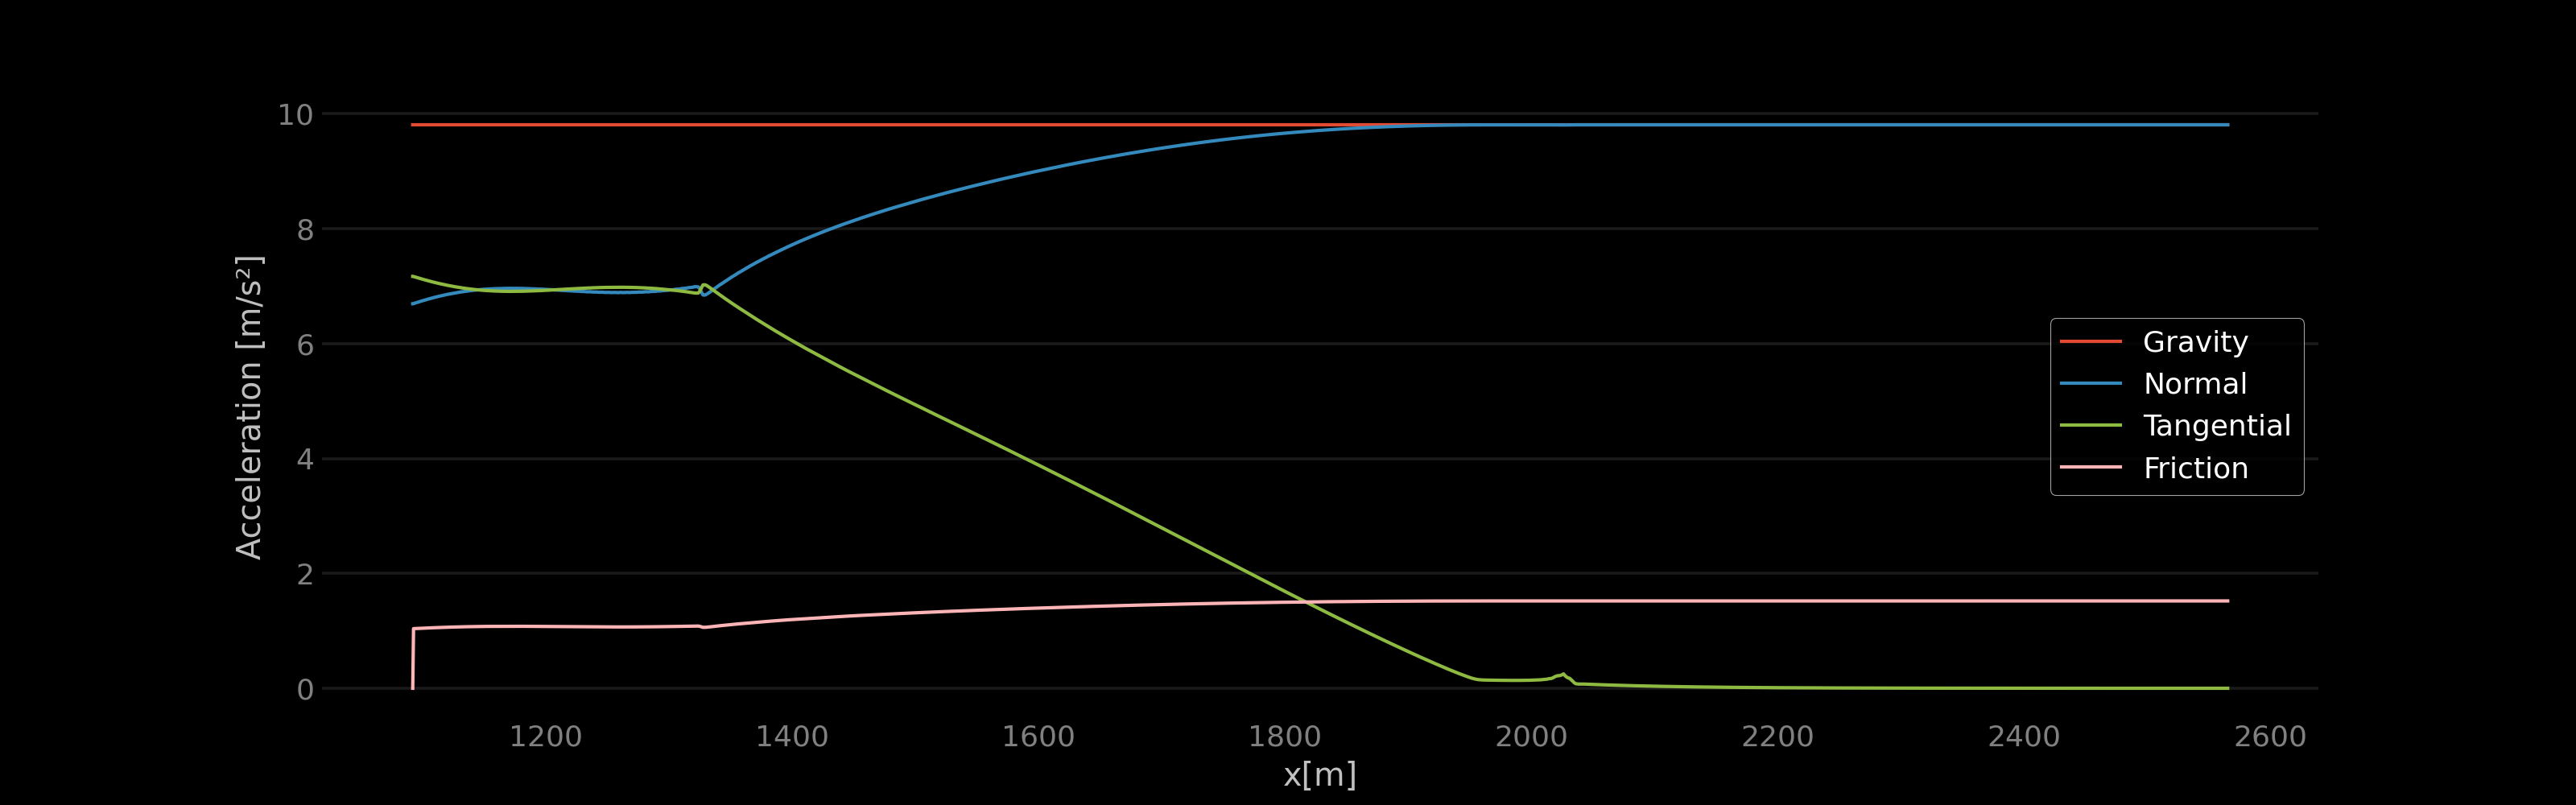

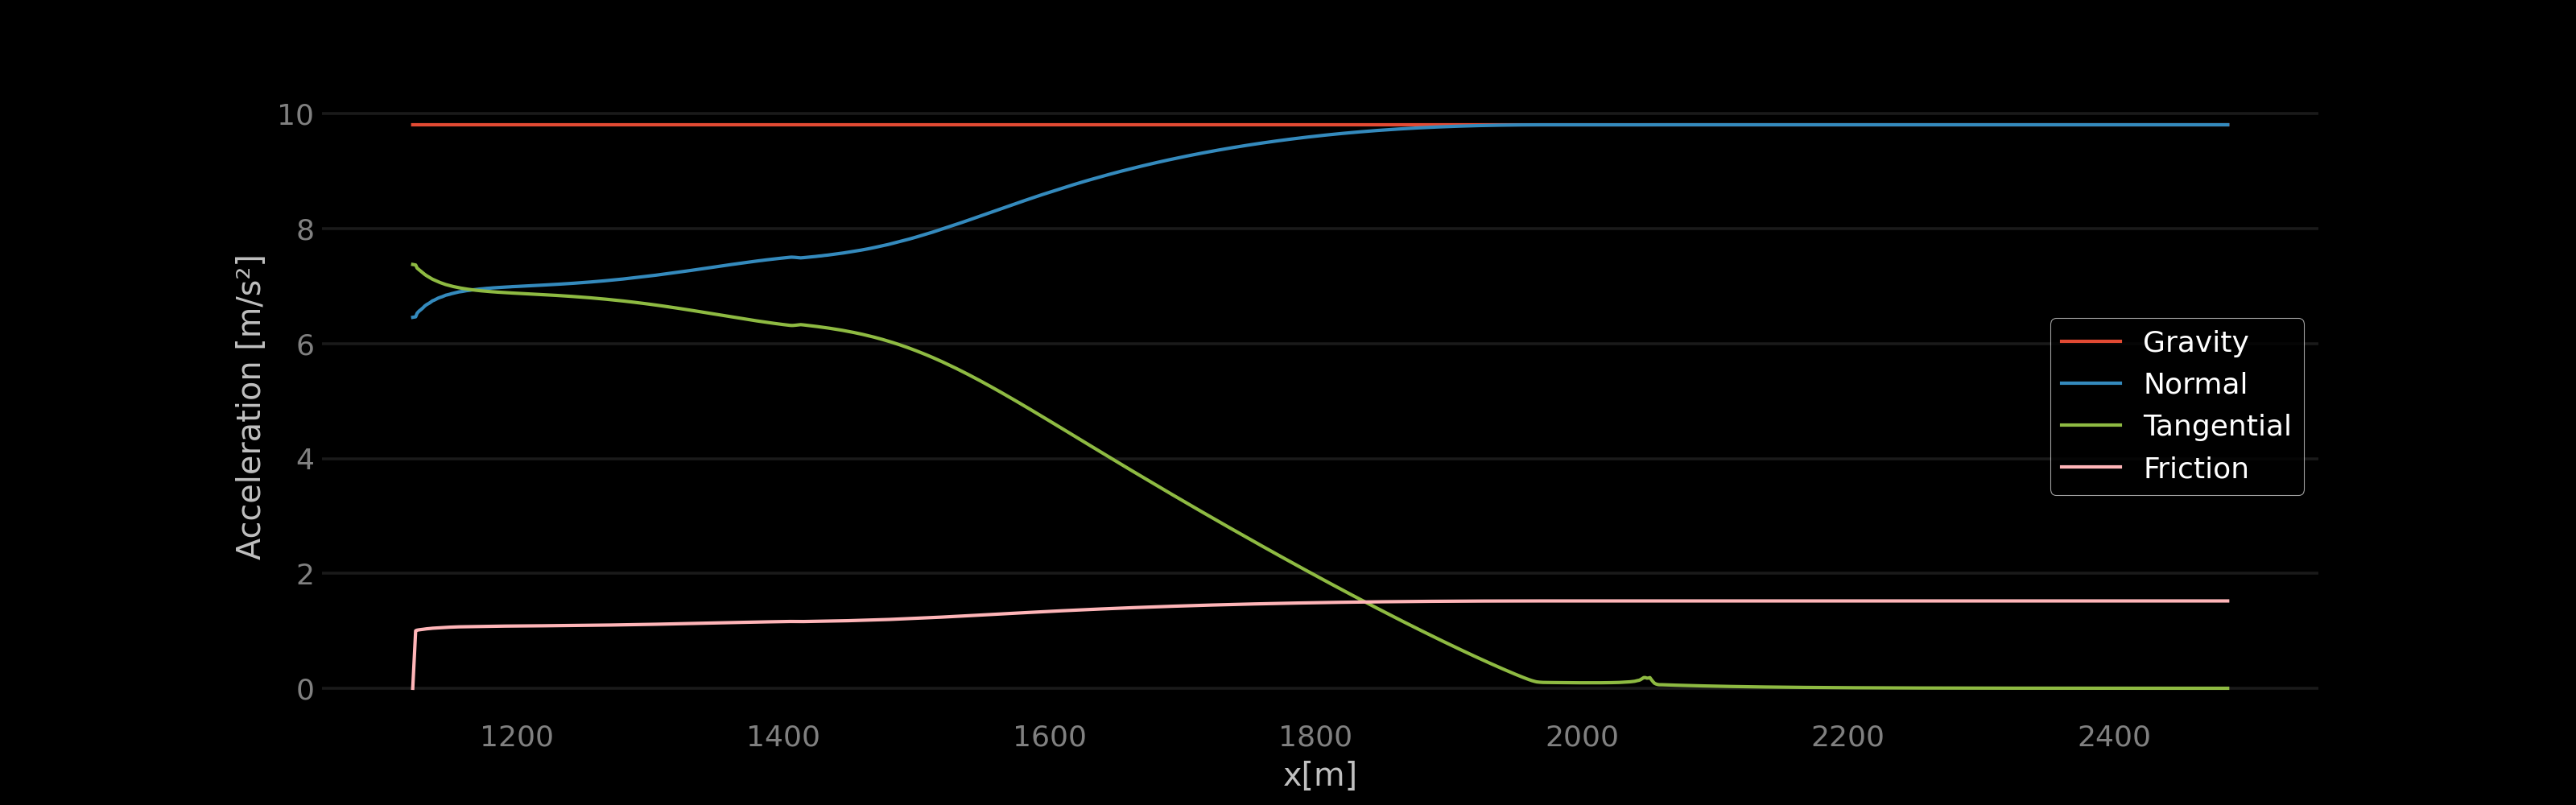

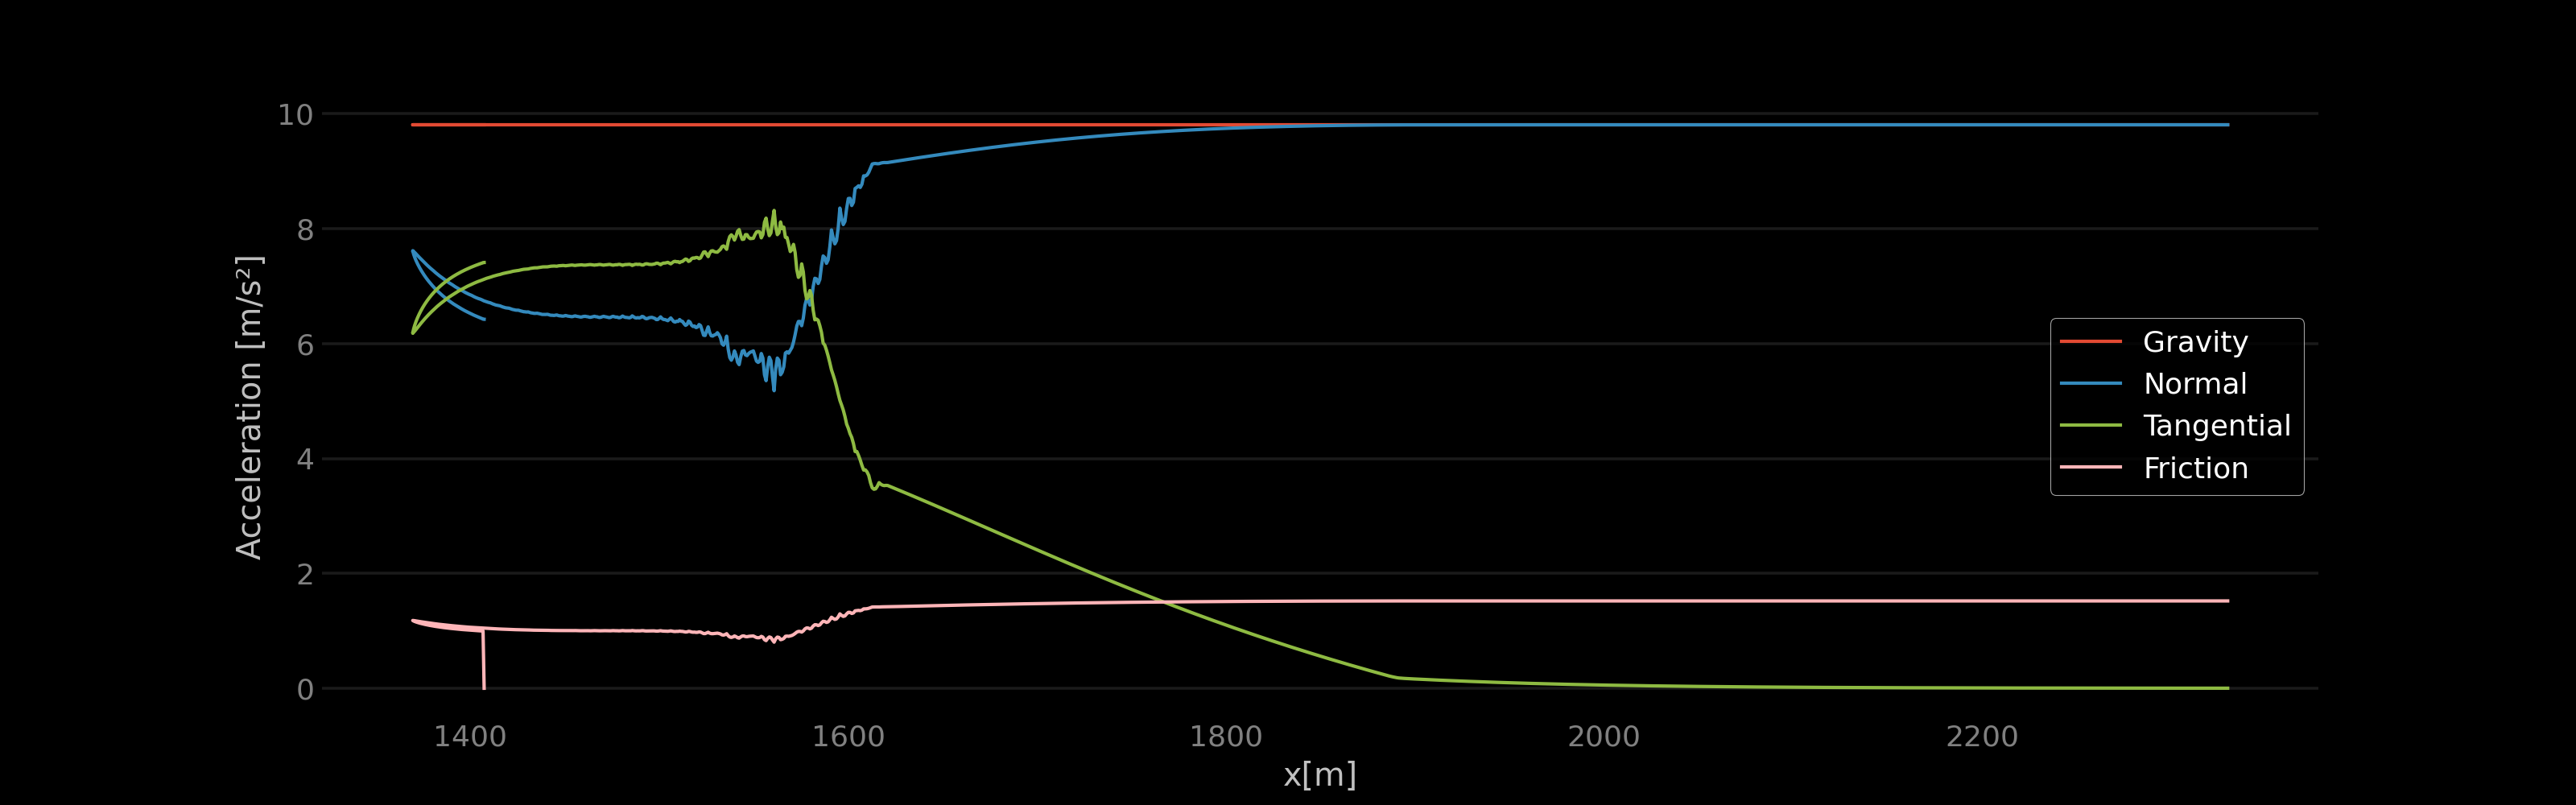

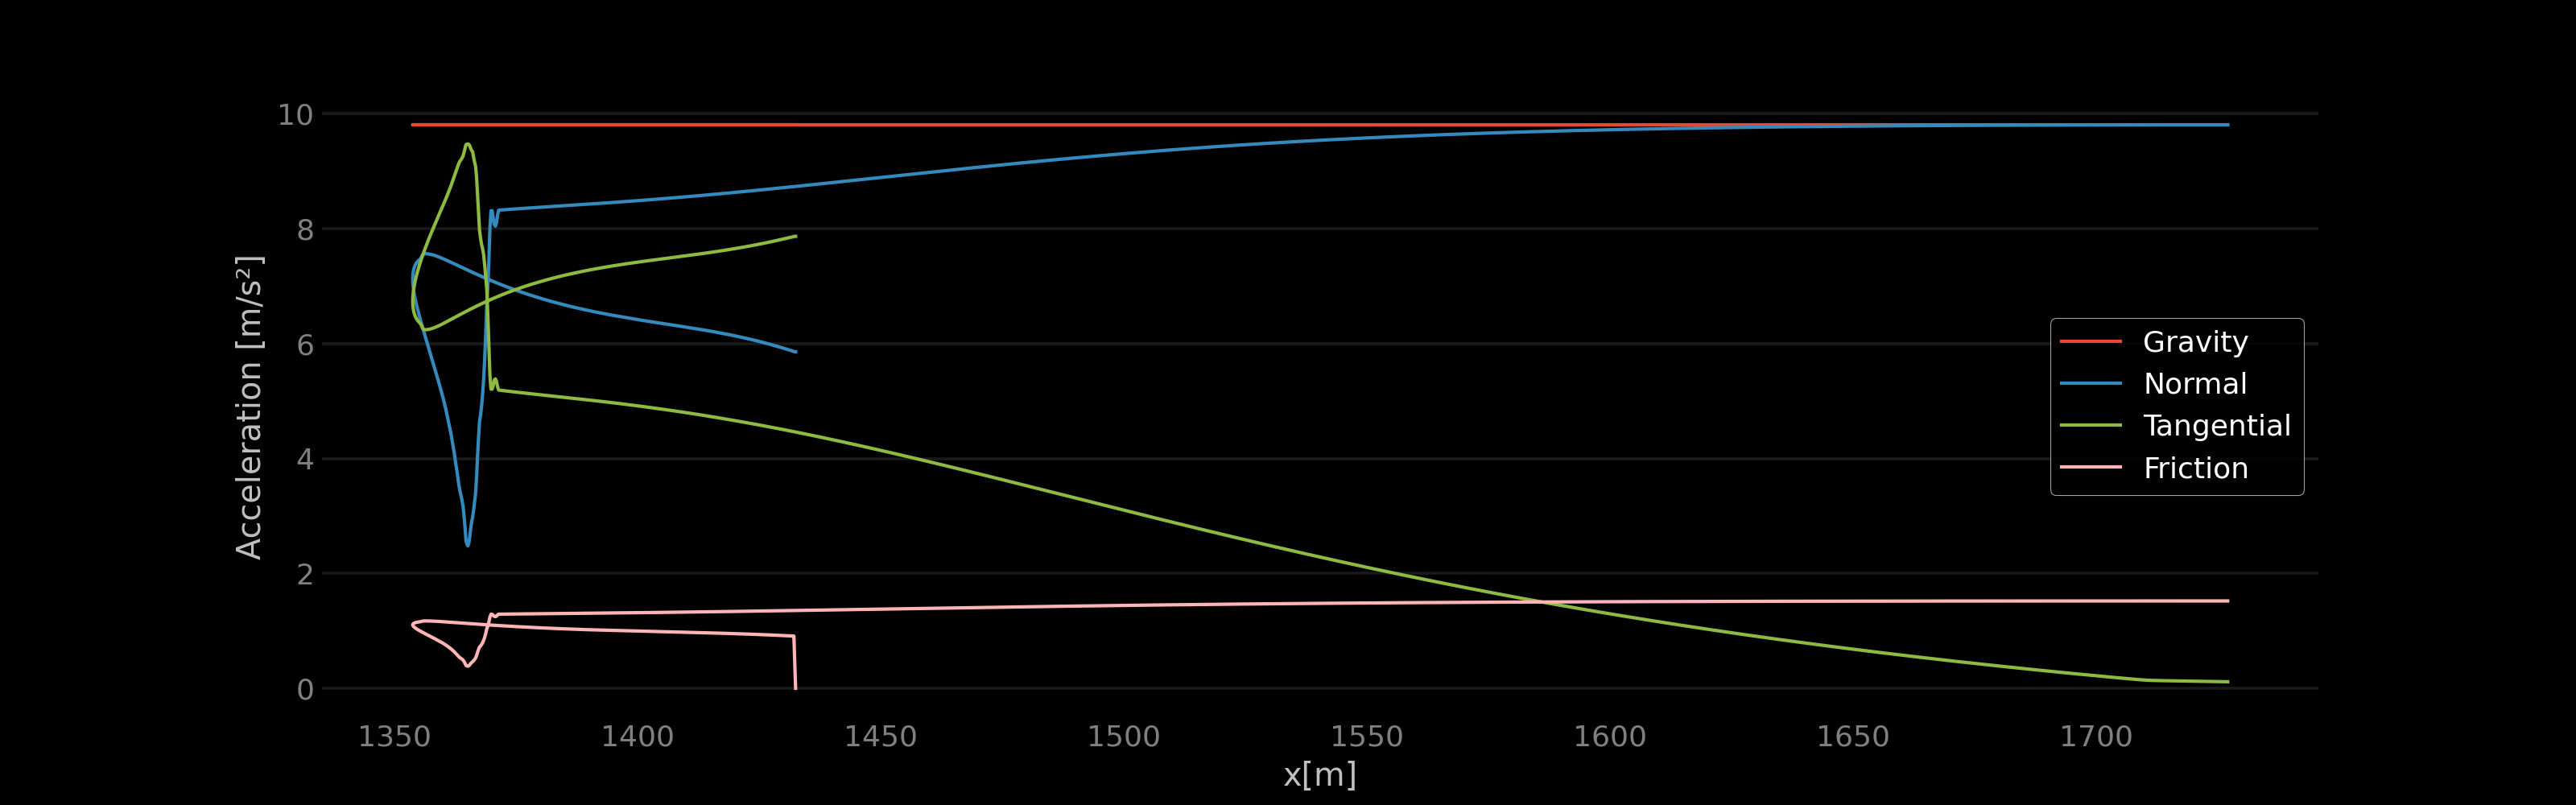

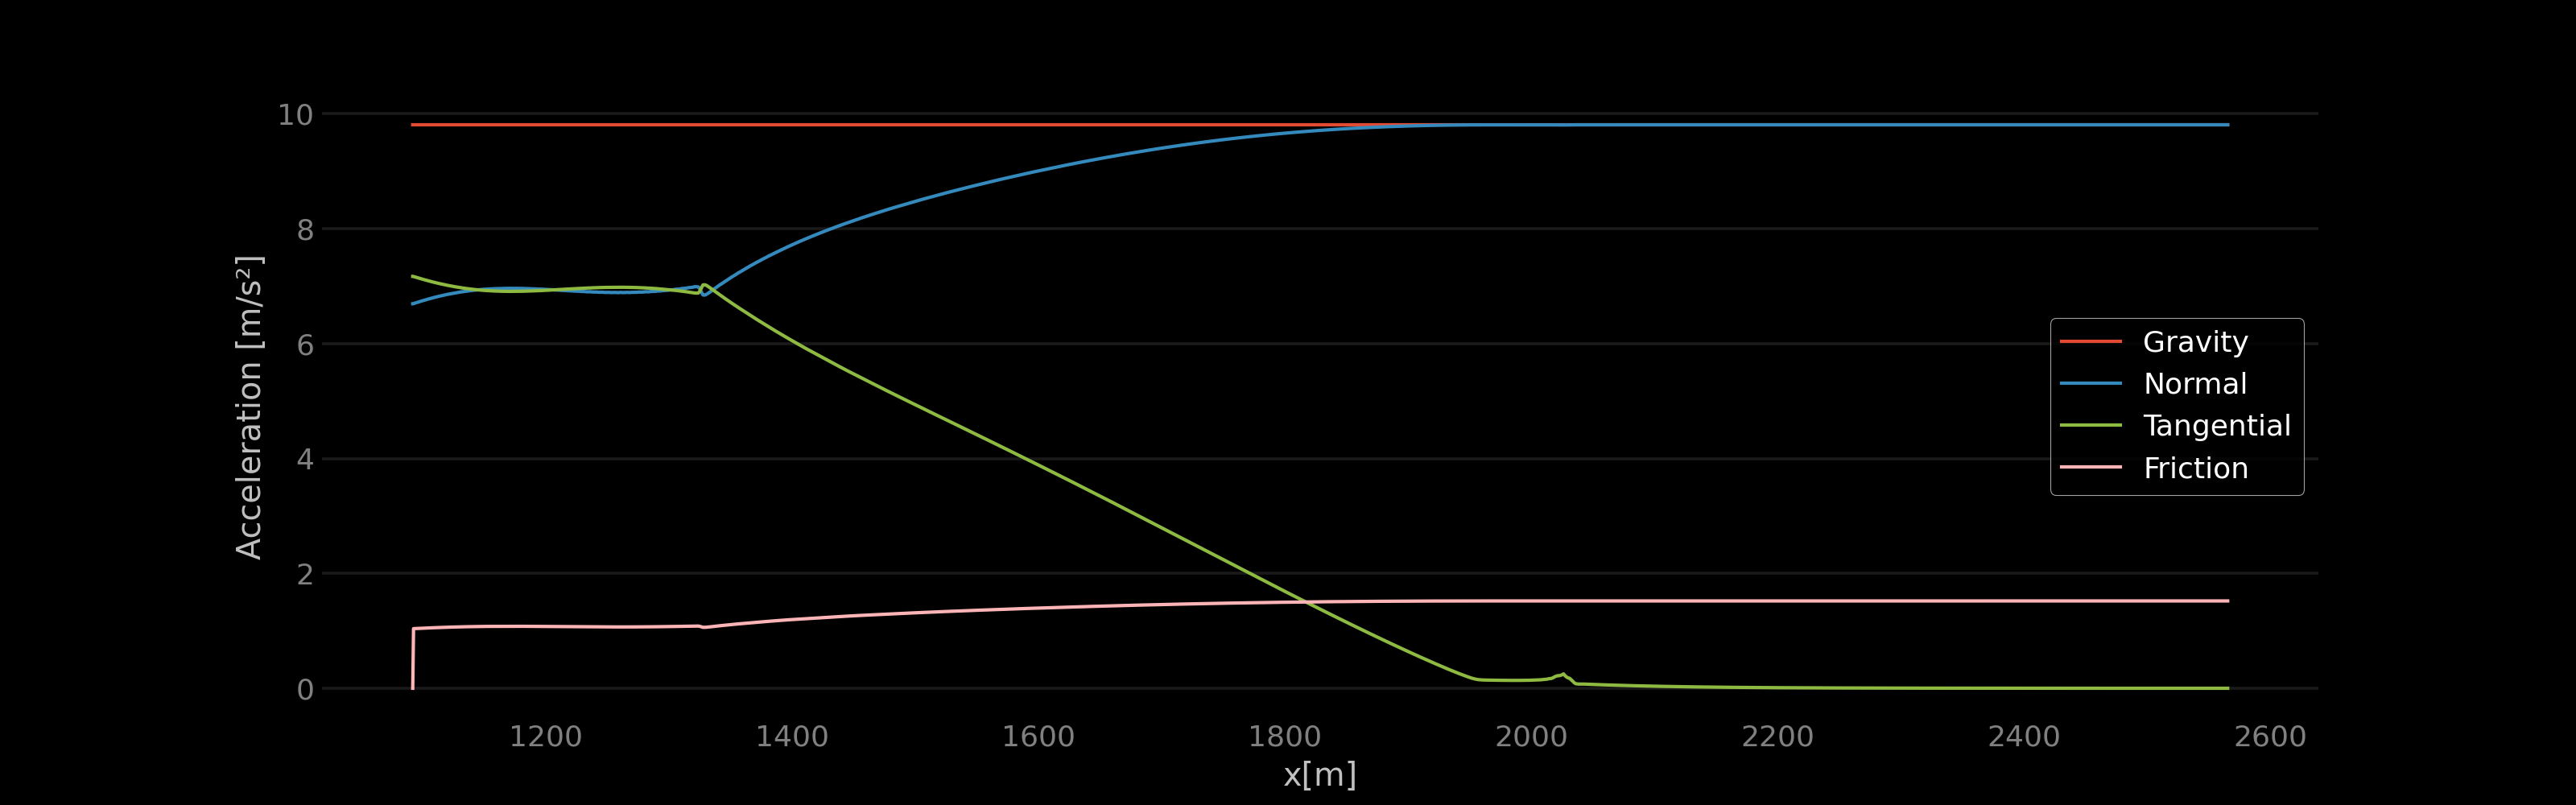

In [19]:
for i in range(n_trajectories):
    fig, ax = plt.subplots()
    for a, label in [(a_gs, "Gravity"), (a_ns, "Normal"), (a_ts, "Tangential"), (a_fs, "Friction")]:
        ax.plot(trajectory[i, 1:stop[i], 0], np.linalg.norm(a[i, :, :], axis=1)[1:stop[i]], label=label)
    ax.legend()
    ax.set(xlabel='x[m]', ylabel='Acceleration [m/s²]')